#Bank Marketing Campaign


### Bank client data:   

1 - age (numeric)    

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur' 'housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')   

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')




### Definitions:

Euribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another. There are different maturities, ranging from one week to one year. 
The Euribor rates are considered to be the most important reference rates in the European money market.    
The interest rates do provide the basis for the price and interest rates of all kinds of financial products like interest rate swaps, interest rate futures, saving accounts and mortgages. That’s the exact reason why many professionals as well as individuals do monitor the development of the Euribor rates intensively.   

Consumer confidence index provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings

### Libraries to be used

In [1]:
#import all the necessary libraries here

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re

#Pre-processing libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #encoding categorical variables 
from sklearn.preprocessing import StandardScaler #scaling numerical features
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit

#Linear/logistic classifier (with regularization) (used for feature importance as well)
from sklearn.linear_model import SGDClassifier

#Bagging models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier #can be used for feature selection
from sklearn.ensemble import ExtraTreesClassifier

#Boosting models 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

# Hyper-parameter tuning options using Grid and Random search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Evaluation Metrics 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# Connect to google drive
in_colab = False

try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir("/content/drive/My Drive/Capstone/Project_2")
    in_colab = True
except:
    pass

Mounted at /content/drive


#Exploratory Data Analysis

In [ ]:
filepath = "Data/bank-additional-full.csv"
raw_df = pd.read_csv(filepath)

In [ ]:
raw_df.head()

age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                                                                                                                                                                          
3  40;"admin.";"married";"basic.6y";"no";"no";"no...                                                                                                                                                                          
4  56;"services";"married";"high.school";"no";"no...

In [ ]:
raw_df.shape

(41188, 1)

Need to format the dataframe to get it into a tabular form

In [ ]:
raw_df.columns

Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')

In [ ]:
raw_df.head(2)

age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...

In [ ]:
#Initial cleaning to get the data into right tabular form 
def clean_data(raw_df):

    df = raw_df.copy()
    col_names = df.columns
    col_lst = col_names.tolist()[0].split(';')
    col_lst = [re.sub(r'\W+', '', x) for x in col_lst]
    df.columns = ['all']
    new_row_lst = df['all'].str.split(";").to_list()
    formatted_df = pd.DataFrame(new_row_lst, columns = col_lst)

    formatted_df = formatted_df.applymap(lambda x: x.replace('"', ''))
    formatted_df['education'] = formatted_df['education'].apply(lambda x: x.replace('.', ' '))

    float_cols = ['empvarrate', 'conspriceidx', 'consconfidx',
       'euribor3m', 'nremployed']

    int_cols = ['age', 'duration',  'pdays', 'campaign',
       'previous']

    formatted_df[float_cols] = formatted_df[float_cols].astype(float)
    formatted_df[int_cols] = formatted_df[int_cols].astype(int)
    
    #shifting pdays by an increment of 1
    formatted_df['pdays'] = [x+1 for x in formatted_df['pdays']]
    #replace 999 by 0
    formatted_df['pdays'] = [0 if x == 1000 else x for x in formatted_df['pdays']]

    formatted_df.y = formatted_df.y.map({'yes': 1, 'no' : 0})


    return formatted_df

In [ ]:
formatted_df = clean_data(raw_df)
#print(formatted_df.columns)

formatted_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic 4y       no      no   no  telephone   
1   57   services  married  high school  unknown      no   no  telephone   
2   37   services  married  high school       no     yes   no  telephone   
3   40     admin.  married     basic 6y       no      no   no  telephone   
4   56   services  married  high school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome empvarrate  \
0   may         mon  ...         1      0         0  nonexistent        1.1   
1   may         mon  ...         1      0         0  nonexistent        1.1   
2   may         mon  ...         1      0         0  nonexistent        1.1   
3   may         mon  ...         1      0         0  nonexistent        1.1   
4   may         mon  ...         1      0         0  nonexistent        1.1   

   conspriceidx  consconfidx  euribor3m  nremployed  y  
0        93.994        -36.4      4.857      5191.0  0  
1        93.994        -36.4      4.857      5191.0  0  
2        93.994        -36.4      4.857      5191.0  0  
3        93.994        -36.4      4.857      5191.0  0  
4        93.994        -36.4      4.857      5191.0  0  

[5 rows x 21 columns]

In [ ]:
formatted_df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593      0.258012      0.172963   
std       10.42125    259.279249      2.770014      1.510327      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000      0.000000      0.000000   
50%       38.00000    180.000000      2.000000      0.000000      0.000000   
75%       47.00000    319.000000      3.000000      0.000000      0.000000   
max       98.00000   4918.000000     56.000000     28.000000      7.000000   

         empvarrate  conspriceidx   consconfidx     euribor3m    nremployed  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.081886     93.575664    -40.502600      3.621291   5167.035911   
std        1.570960      0.578840      4.628198      1.734447     72.251528   
min       -3.400000     92.201000    -50.800000      0.634000   4963.600000   
25%       -1.800000     93.075000    -42.700000      1.344000   5099.100000   
50%        1.100000     93.749000    -41.800000      4.857000   5191.000000   
75%        1.400000     93.994000    -36.400000      4.961000   5228.100000   
max        1.400000     94.767000    -26.900000      5.045000   5228.100000   

                  y  
count  41188.000000  
mean       0.112654  
std        0.316173  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [ ]:
formatted_df.to_csv("Data/formatted_df.csv", index = False)

In [ ]:
formatted_df= pd.read_csv("Data/formatted_df.csv")
formatted_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic 4y       no      no   no  telephone   
1   57   services  married  high school  unknown      no   no  telephone   
2   37   services  married  high school       no     yes   no  telephone   
3   40     admin.  married     basic 6y       no      no   no  telephone   
4   56   services  married  high school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome empvarrate  \
0   may         mon  ...         1      0         0  nonexistent        1.1   
1   may         mon  ...         1      0         0  nonexistent        1.1   
2   may         mon  ...         1      0         0  nonexistent        1.1   
3   may         mon  ...         1      0         0  nonexistent        1.1   
4   may         mon  ...         1      0         0  nonexistent        1.1   

   conspriceidx  consconfidx  euribor3m  nremployed  y  
0        93.994        -36.4      4.857      5191.0  0  
1        93.994        -36.4      4.857      5191.0  0  
2        93.994        -36.4      4.857      5191.0  0  
3        93.994        -36.4      4.857      5191.0  0  
4        93.994        -36.4      4.857      5191.0  0  

[5 rows x 21 columns]

In [ ]:
formatted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           41188 non-null  int64  
 1   job           41188 non-null  object 
 2   marital       41188 non-null  object 
 3   education     41188 non-null  object 
 4   default       41188 non-null  object 
 5   housing       41188 non-null  object 
 6   loan          41188 non-null  object 
 7   contact       41188 non-null  object 
 8   month         41188 non-null  object 
 9   day_of_week   41188 non-null  object 
 10  duration      41188 non-null  int64  
 11  campaign      41188 non-null  int64  
 12  pdays         41188 non-null  int64  
 13  previous      41188 non-null  int64  
 14  poutcome      41188 non-null  object 
 15  empvarrate    41188 non-null  float64
 16  conspriceidx  41188 non-null  float64
 17  consconfidx   41188 non-null  float64
 18  euribor3m     41188 non-nu

### Distribution of numeric variables 

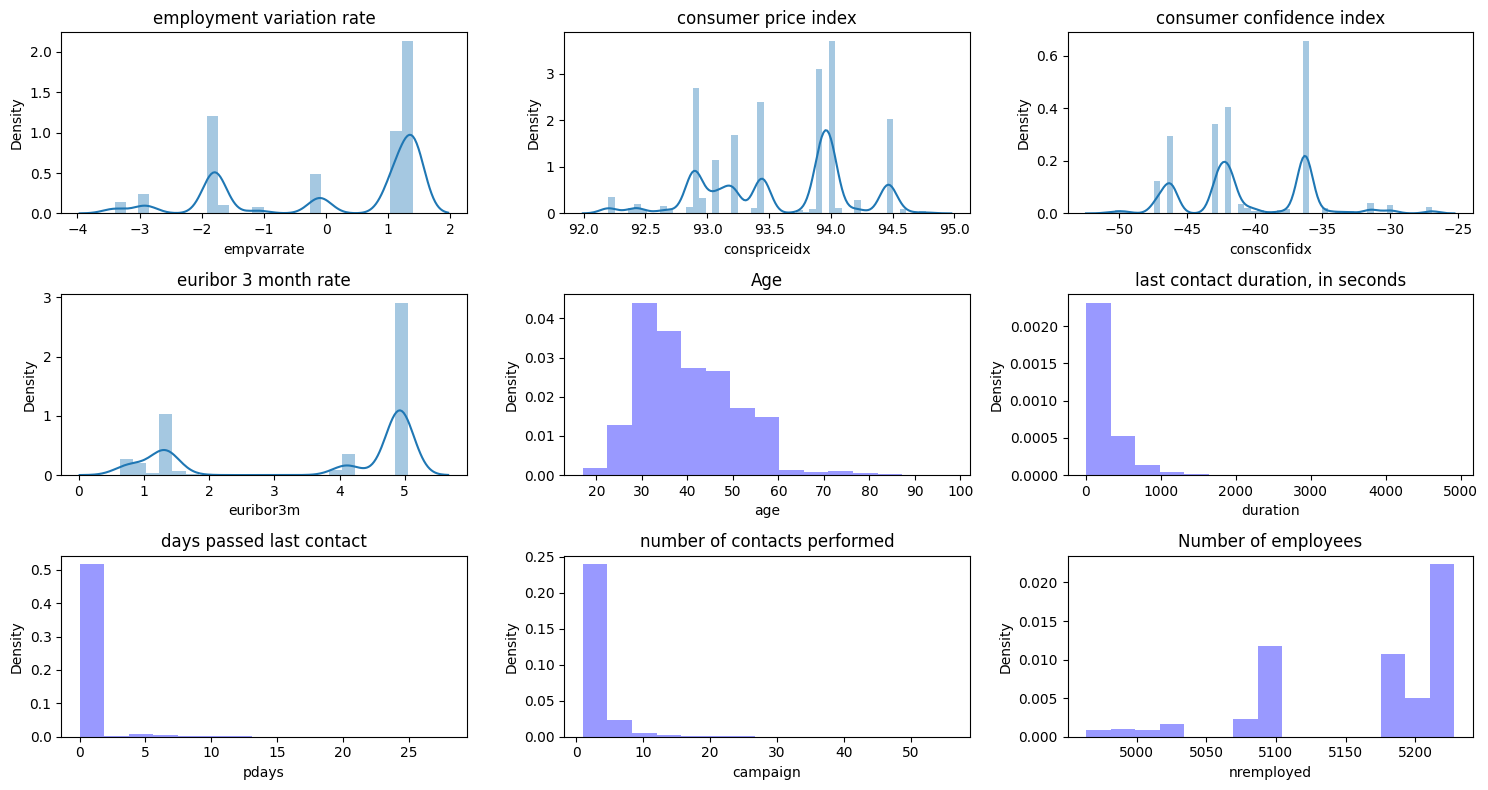

In [ ]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 3, figsize=(15, 8), sharey=False, tight_layout=True)

sns.distplot(formatted_df['empvarrate'], ax=axes[0, 0])
axes[0, 0].set_title("employment variation rate")

sns.distplot(formatted_df['conspriceidx'], ax=axes[0, 1])
axes[0, 1].set_title("consumer price index")

sns.distplot(formatted_df['consconfidx'], ax=axes[0, 2])
axes[0, 2].set_title("consumer confidence index")

sns.distplot(formatted_df['euribor3m'], ax=axes[1, 0])
axes[1, 0].set_title("euribor 3 month rate")

sns.histplot(formatted_df['age'], ax=axes[1, 1],
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[1, 1].set_title("Age")

sns.histplot(formatted_df['duration'], ax=axes[1, 2], 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[1, 2].set_title("last contact duration, in seconds")

sns.histplot(formatted_df[formatted_df['pdays'] != 999]['pdays'], ax=axes[2, 0],
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[2, 0].set_title("days passed last contact")

sns.histplot(formatted_df['campaign'], ax=axes[2, 1],
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[2, 1].set_title("number of contacts performed")

sns.histplot(formatted_df['nremployed'], ax=axes[2, 2],
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
axes[2, 2].set_title("Number of employees")

# plt.savefig("distributions.png", dpi=100)
plt.show()

Checking the distribution of the numeric variables by the outcome of the campaign

In [ ]:
successful_df = formatted_df[formatted_df['y'] == 1]
unsuccessful_df = formatted_df[formatted_df['y'] == 0]

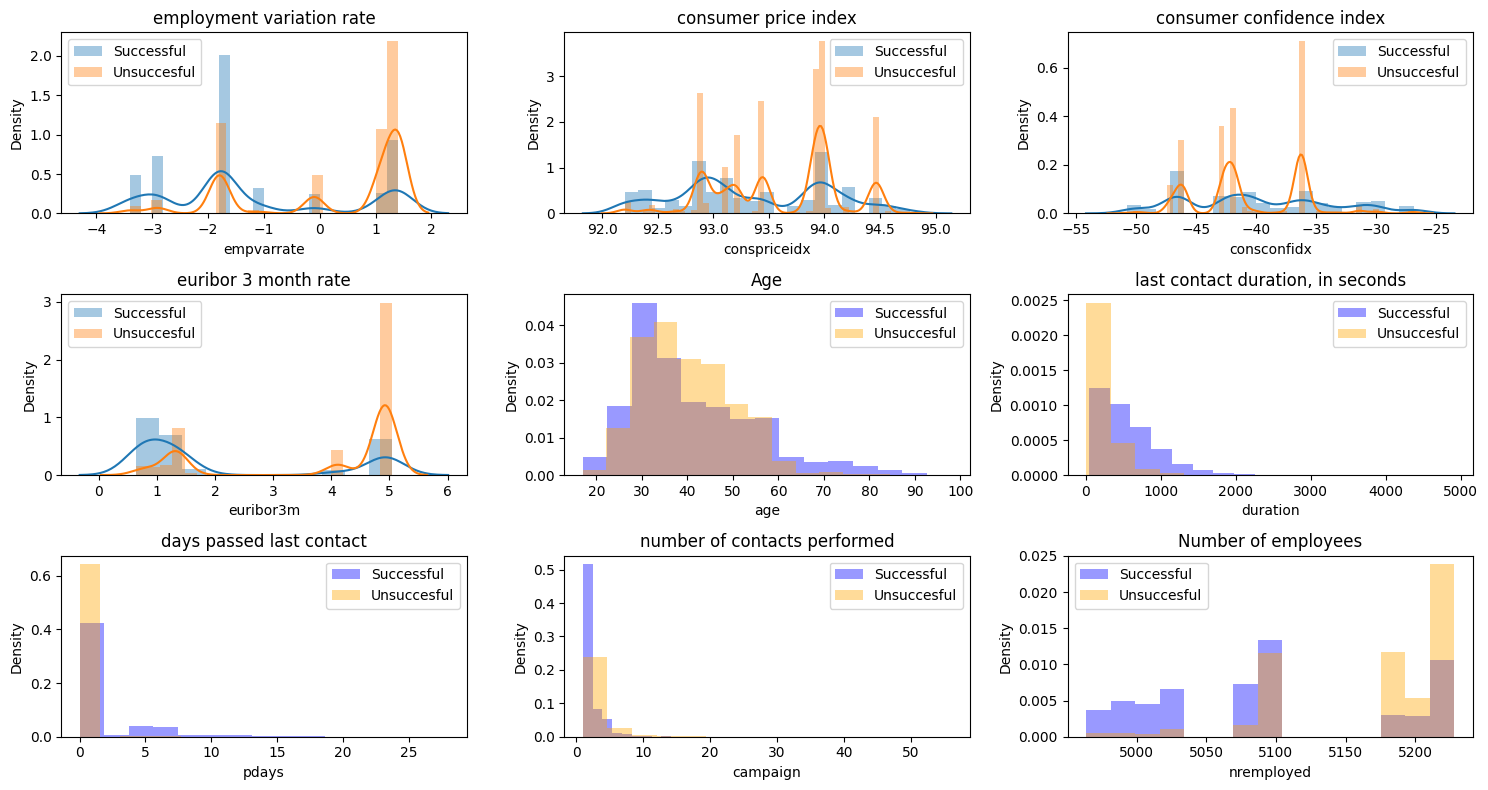

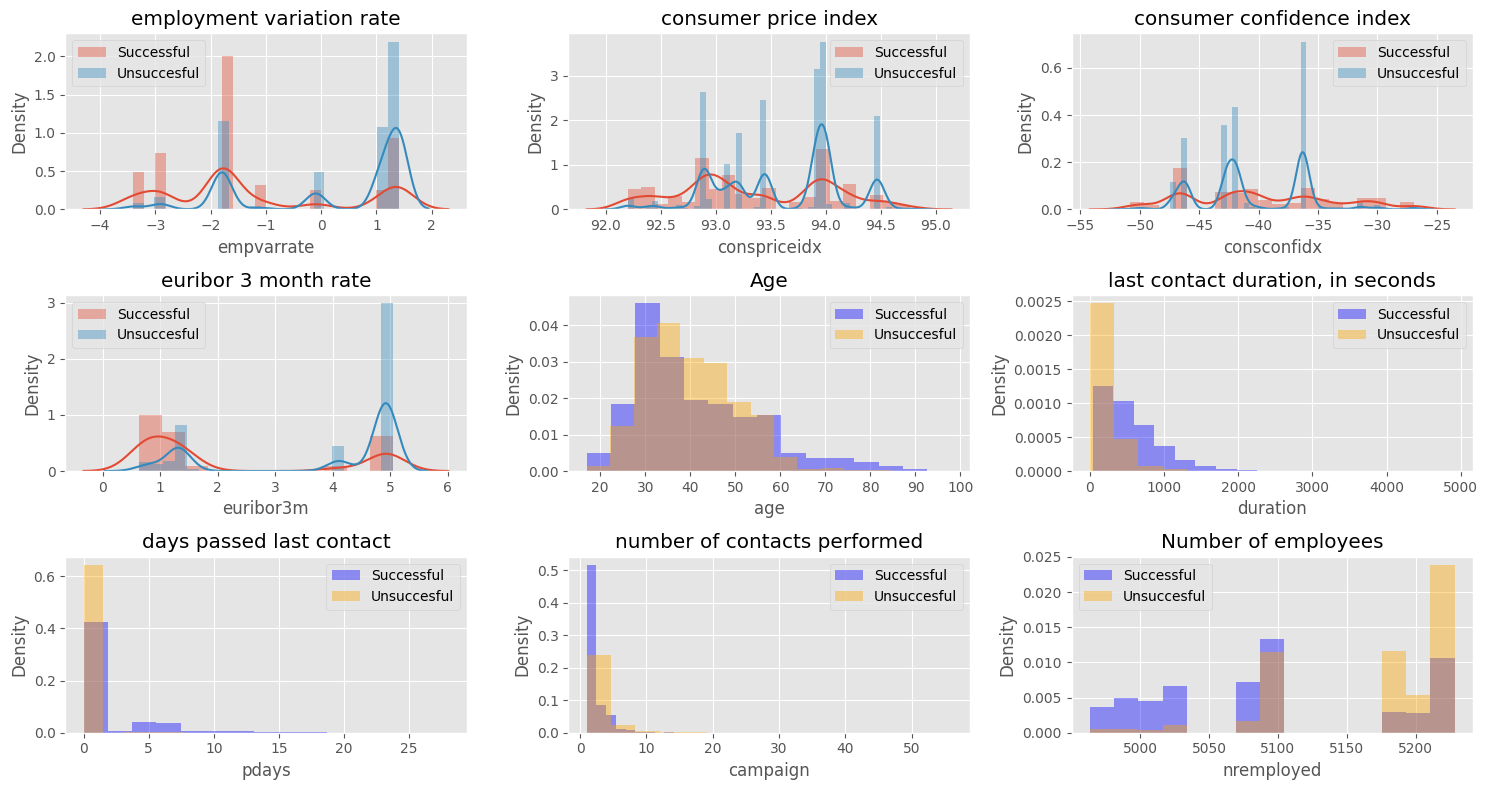

In [ ]:
import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 3, figsize=(15, 8), sharey=False, tight_layout=True)

sns.distplot(successful_df['empvarrate'], ax=axes[0, 0], label='Successful')
sns.distplot(unsuccessful_df['empvarrate'], ax=axes[0, 0], label='Unsuccesful')
axes[0, 0].set_title("employment variation rate")
axes[0, 0].legend()

sns.distplot(successful_df['conspriceidx'], ax=axes[0, 1], label='Successful')
sns.distplot(unsuccessful_df['conspriceidx'], ax=axes[0, 1], label='Unsuccesful')
axes[0, 1].set_title("consumer price index")
axes[0, 1].legend()

sns.distplot(successful_df['consconfidx'], ax=axes[0, 2], label='Successful')
sns.distplot(unsuccessful_df['consconfidx'], ax=axes[0, 2], label='Unsuccesful')
axes[0, 2].set_title("consumer confidence index")
axes[0, 2].legend()

sns.distplot(successful_df['euribor3m'], ax=axes[1, 0], label='Successful')
sns.distplot(unsuccessful_df['euribor3m'], ax=axes[1, 0], label='Unsuccesful')
axes[1, 0].set_title("euribor 3 month rate")
axes[1, 0].legend()

sns.histplot(successful_df['age'], ax=axes[1, 1], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df['age'], ax=axes[1, 1], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[1, 1].set_title("Age")
axes[1, 1].legend()

sns.histplot(successful_df['duration'], ax=axes[1, 2], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df['duration'], ax=axes[1, 2], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[1, 2].set_title("last contact duration, in seconds")
axes[1, 2].legend()

sns.histplot(successful_df[successful_df['pdays'] != 999]['pdays'], ax=axes[2, 0], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df[unsuccessful_df['pdays'] != 999]['pdays'], ax=axes[2, 0], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[2, 0].set_title("days passed last contact")
axes[2, 0].legend()

sns.histplot(successful_df['campaign'], ax=axes[2, 1], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df['campaign'], ax=axes[2, 1], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[2, 1].set_title("number of contacts performed")
axes[2, 1].legend()

sns.histplot(successful_df['nremployed'], ax=axes[2, 2], label='Successful', 
             stat="density", bins=15, color = 'blue', alpha=0.4, edgecolor='none')
sns.histplot(unsuccessful_df['nremployed'], ax=axes[2, 2], label='Unsuccesful', 
             stat="density", bins=15, color='orange', alpha=0.4, edgecolor='none')
axes[2, 2].set_title("Number of employees")
axes[2, 2].legend()

# plt.savefig("distributions.png", dpi=100)
plt.show()

## EDA on Categorical Variables

In [ ]:
for avar in formatted_df.columns:
  if formatted_df[avar].dtype == 'object':
    print("The unique values for ", avar, "is: ", formatted_df[avar].unique())
    print("The count for each category: \n", formatted_df[avar].value_counts())
    print("\n")

The unique values for  job is:  ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
The count for each category: 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


The unique values for  marital is:  ['married' 'single' 'divorced' 'unknown']
The count for each category: 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


The unique values for  education is:  ['basic 4y' 'high school' 'basic 6y' 'basic 9y' 'professional course'
 'unknown' 'university degree' 'illiterate']
The count for each category: 
 university degree      12168
high school             9515
basic 9y                6045
pro

In [ ]:
counts = pd.DataFrame(formatted_df.groupby('job')['y'].value_counts()).rename(columns={'y':"count"})
counts = counts.reset_index()
counts.head()

job  y  count
0        admin.  0   9070
1        admin.  1   1352
2   blue-collar  0   8616
3   blue-collar  1    638
4  entrepreneur  0   1332

job  y  count
0        admin.  0   9070
1        admin.  1   1352
2   blue-collar  0   8616
3   blue-collar  1    638
4  entrepreneur  0   1332

In [ ]:
totals = pd.DataFrame(counts.groupby('job')['count'].sum()).rename(columns={'count': 'total'})
totals = totals.reset_index()
totals.head()

job  total
0        admin.  10422
1   blue-collar   9254
2  entrepreneur   1456
3     housemaid   1060
4    management   2924

job  total
0        admin.  10422
1   blue-collar   9254
2  entrepreneur   1456
3     housemaid   1060
4    management   2924

In [ ]:
counts = counts.merge(totals, how='left', on='job')
counts.head()

job  y  count  total
0        admin.  0   9070  10422
1        admin.  1   1352  10422
2   blue-collar  0   8616   9254
3   blue-collar  1    638   9254
4  entrepreneur  0   1332   1456

job  y  count  total
0        admin.  0   9070  10422
1        admin.  1   1352  10422
2   blue-collar  0   8616   9254
3   blue-collar  1    638   9254
4  entrepreneur  0   1332   1456

In [ ]:
yes = counts[counts['y'] == 1].copy()
yes = yes.reset_index(drop=True)
yes = yes.drop('y', axis=1)
yes = yes.rename(columns={"count": 'yes'})

full = yes.copy()
full['no'] = full['total'] - full['yes']
full = full[['job', 'yes', 'no', 'total']]
full['yes_%'] = (full['yes'] / full['total'])*100
full = full.round({'yes_%': 1}).sort_values("yes_%", ascending=False)
full.head()

job   yes    no  total  yes_%
8      student   275   600    875   31.4
5      retired   434  1286   1720   25.2
10  unemployed   144   870   1014   14.2
0       admin.  1352  9070  10422   13.0
4   management   328  2596   2924   11.2

job   yes    no  total  yes_%
8      student   275   600    875   31.4
5      retired   434  1286   1720   25.2
10  unemployed   144   870   1014   14.2
0       admin.  1352  9070  10422   13.0
4   management   328  2596   2924   11.2

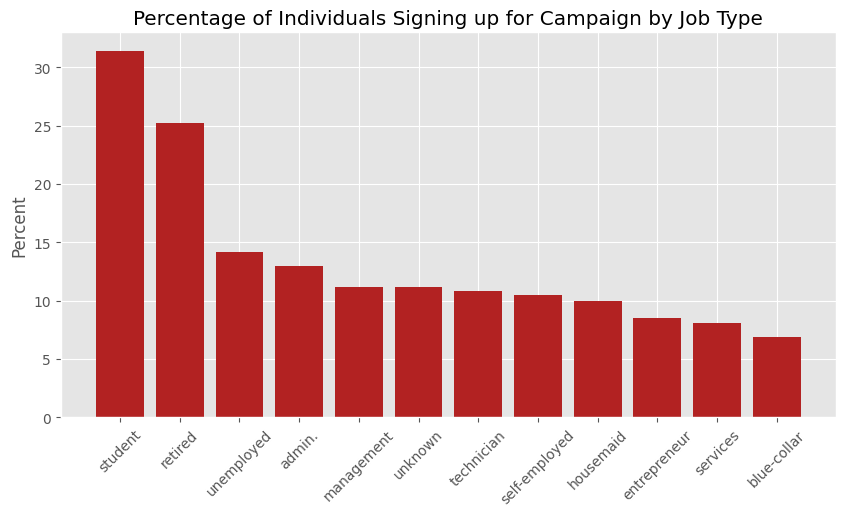

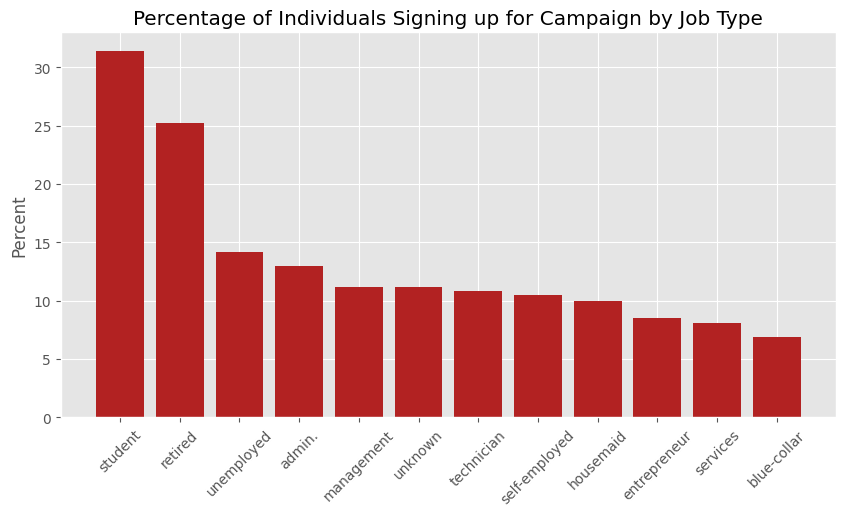

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10,5))

plt.bar(full['job'], full['yes_%'], color='firebrick')
plt.xticks(rotation=45)
plt.title("Percentage of Individuals Signing up for Campaign by Job Type")
plt.ylabel("Percent")
# plt.savefig("campaign_success_by_job.png", dpi=100, bbox_inches="tight")
plt.show()

#### Distribution of Categorical variables

In [ ]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

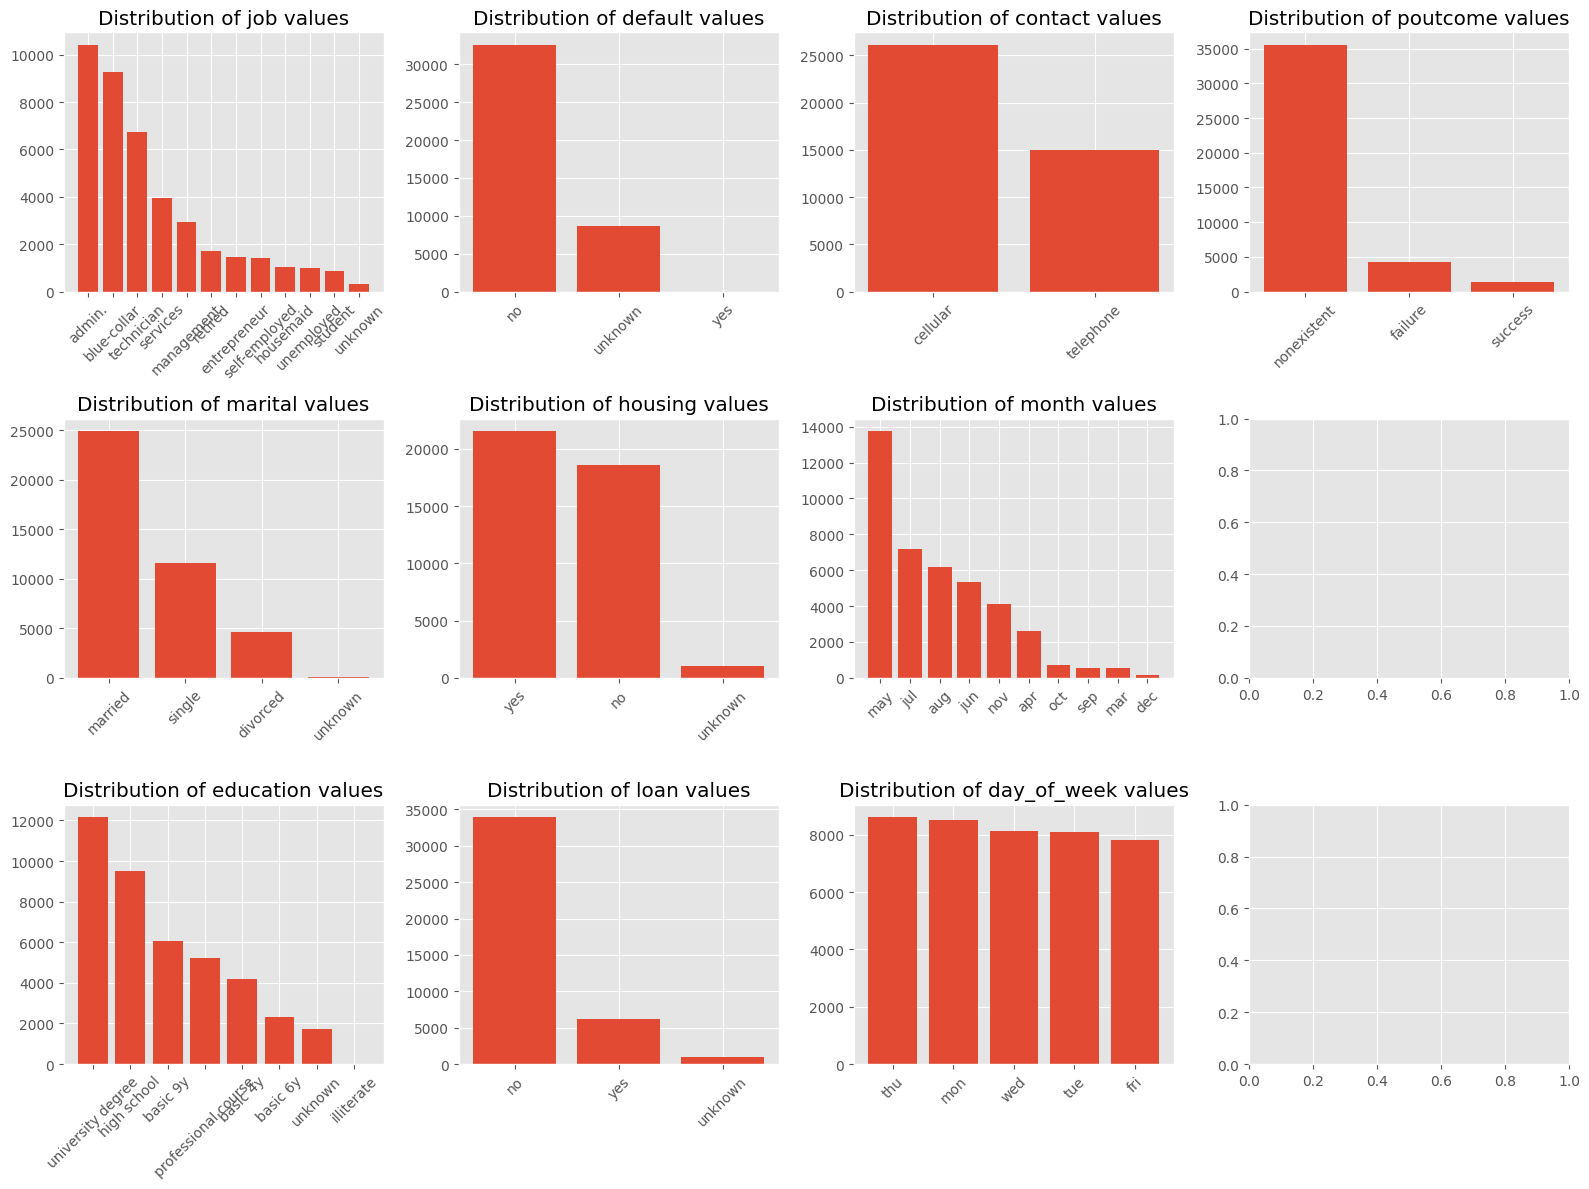

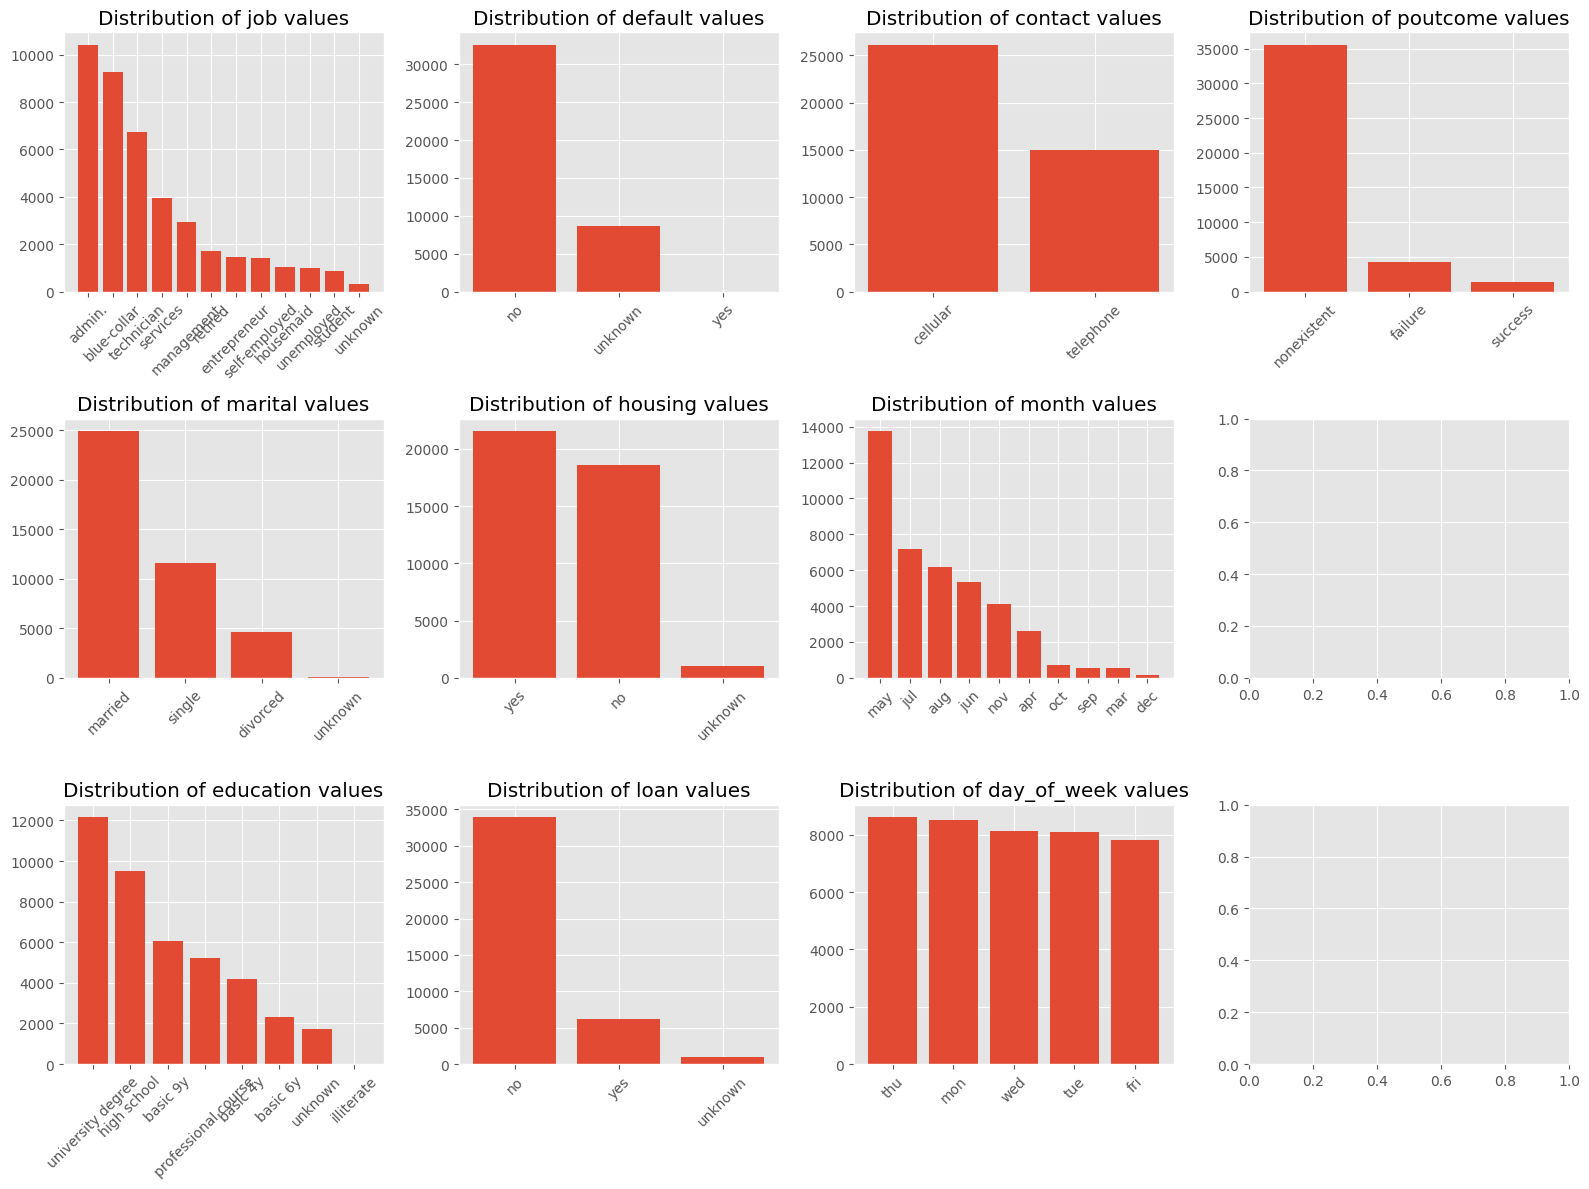

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(16,12), tight_layout=True)

i = 0
j = 0
for col in cat_cols:

    ax[i, j].bar(formatted_df[col].value_counts().index, formatted_df[col].value_counts())
    ax[i, j].set_xticklabels(formatted_df[col].value_counts().index, rotation=45)
    ax[i, j].set_title(f"Distribution of {col} values")
    
    i += 1
    if i > 2:
        i = 0
        j +=1

plt.show()

Since there are a substantial number of unknown values for most categorical variables, we need to come up with a strategy from:
1. Drop unknown values
2. Treating unknowns as a unique category in itself
3. Unknown value imputation 

#### Strategy 1: Drop the rows with an 'unknown' value in them

In [ ]:
df_copy = formatted_df.copy()
no_unknowns = df_copy.replace('unknown',np.nan).dropna(axis = 0, how = 'any')

no_unknowns.head()

age        job  marital            education default housing loan  \
0   56  housemaid  married             basic 4y      no      no   no   
2   37   services  married          high school      no     yes   no   
3   40     admin.  married             basic 6y      no      no   no   
4   56   services  married          high school      no      no  yes   
6   59     admin.  married  professional course      no      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1      0         0  nonexistent   
2  telephone   may         mon  ...         1      0         0  nonexistent   
3  telephone   may         mon  ...         1      0         0  nonexistent   
4  telephone   may         mon  ...         1      0         0  nonexistent   
6  telephone   may         mon  ...         1      0         0  nonexistent   

  empvarrate  conspriceidx  consconfidx  euribor3m  nremployed  y  
0        1.1        93.994        -36.4      4.857      5191.0  0  
2        1.1        93.994        -36.4      4.857      5191.0  0  
3        1.1        93.994        -36.4      4.857      5191.0  0  
4        1.1        93.994        -36.4      4.857      5191.0  0  
6        1.1        93.994        -36.4      4.857      5191.0  0  

[5 rows x 21 columns]

age        job  marital            education default housing loan  \
0   56  housemaid  married             basic 4y      no      no   no   
2   37   services  married          high school      no     yes   no   
3   40     admin.  married             basic 6y      no      no   no   
4   56   services  married          high school      no      no  yes   
6   59     admin.  married  professional course      no      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1      0         0  nonexistent   
2  telephone   may         mon  ...         1      0         0  nonexistent   
3  telephone   may         mon  ...         1      0         0  nonexistent   
4  telephone   may         mon  ...         1      0         0  nonexistent   
6  telephone   may         mon  ...         1      0         0  nonexistent   

  empvarrate  conspriceidx  consconfidx  euribor3m  nremployed  y  
0        1.1        93.994        -36.4      4.857      5191.0  0  
2        1.1        93.994        -36.4      4.857      5191.0  0  
3        1.1        93.994        -36.4      4.857      5191.0  0  
4        1.1        93.994        -36.4      4.857      5191.0  0  
6        1.1        93.994        -36.4      4.857      5191.0  0  

[5 rows x 21 columns]

In [ ]:
print("total samples remaining after dropping unknowns: ", no_unknowns.shape[0])

total samples remaining after dropping unknowns:  30488
total samples remaining after dropping unknowns:  30488


In [ ]:
print(f"Percent of rows remaining after dropping unknowns: {np.round(len(no_unknowns) / len(formatted_df)*100, 1)}%")

Percent of rows remaining after dropping unknowns: 74.0%
Percent of rows remaining after dropping unknowns: 74.0%


Correlation between features 

<Axes: >

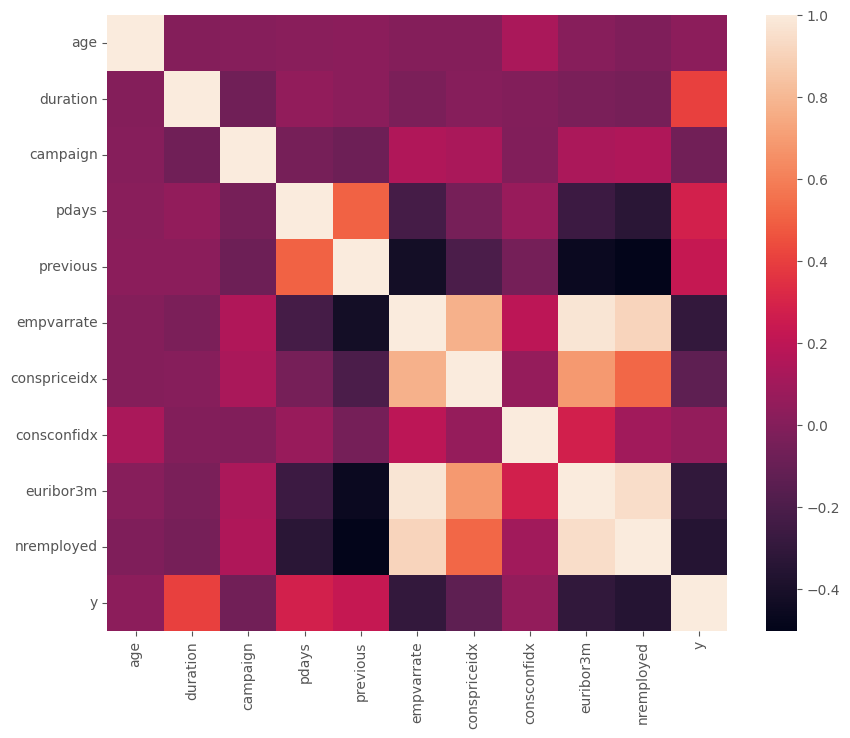

<Axes: >

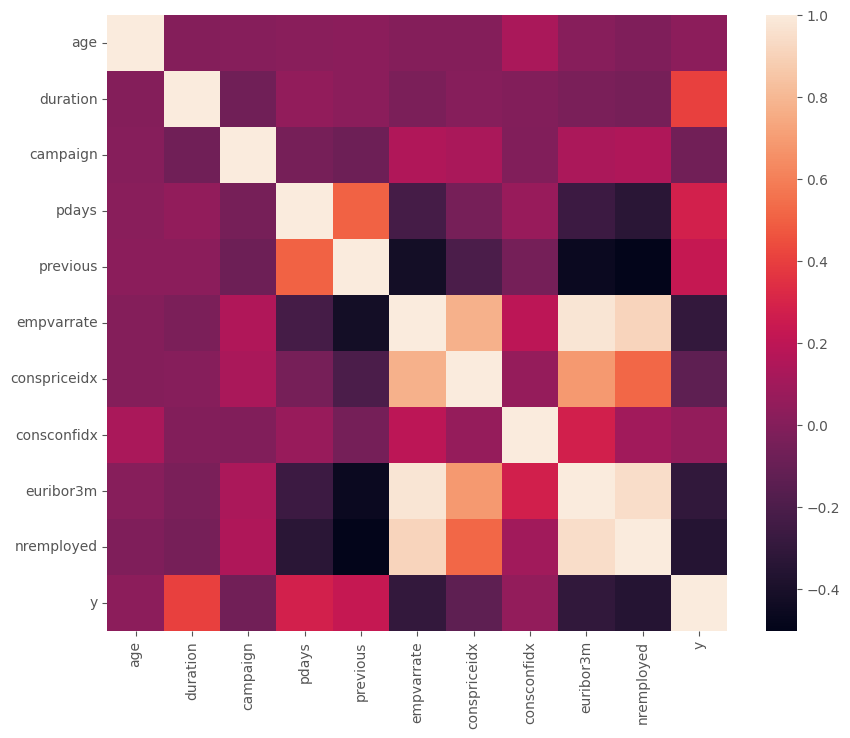

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(formatted_df.corr())

In [ ]:
corr = formatted_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Correlation matrix only involved numeric features

Most postive correlations with y: 'duration', followed by 'pdays' and 'previous'

Most negative correlations with y: 'nremployed', 'euribor3m', 'empvarrate'

The top 3 corelated features: duration, nremployed, euribor3m

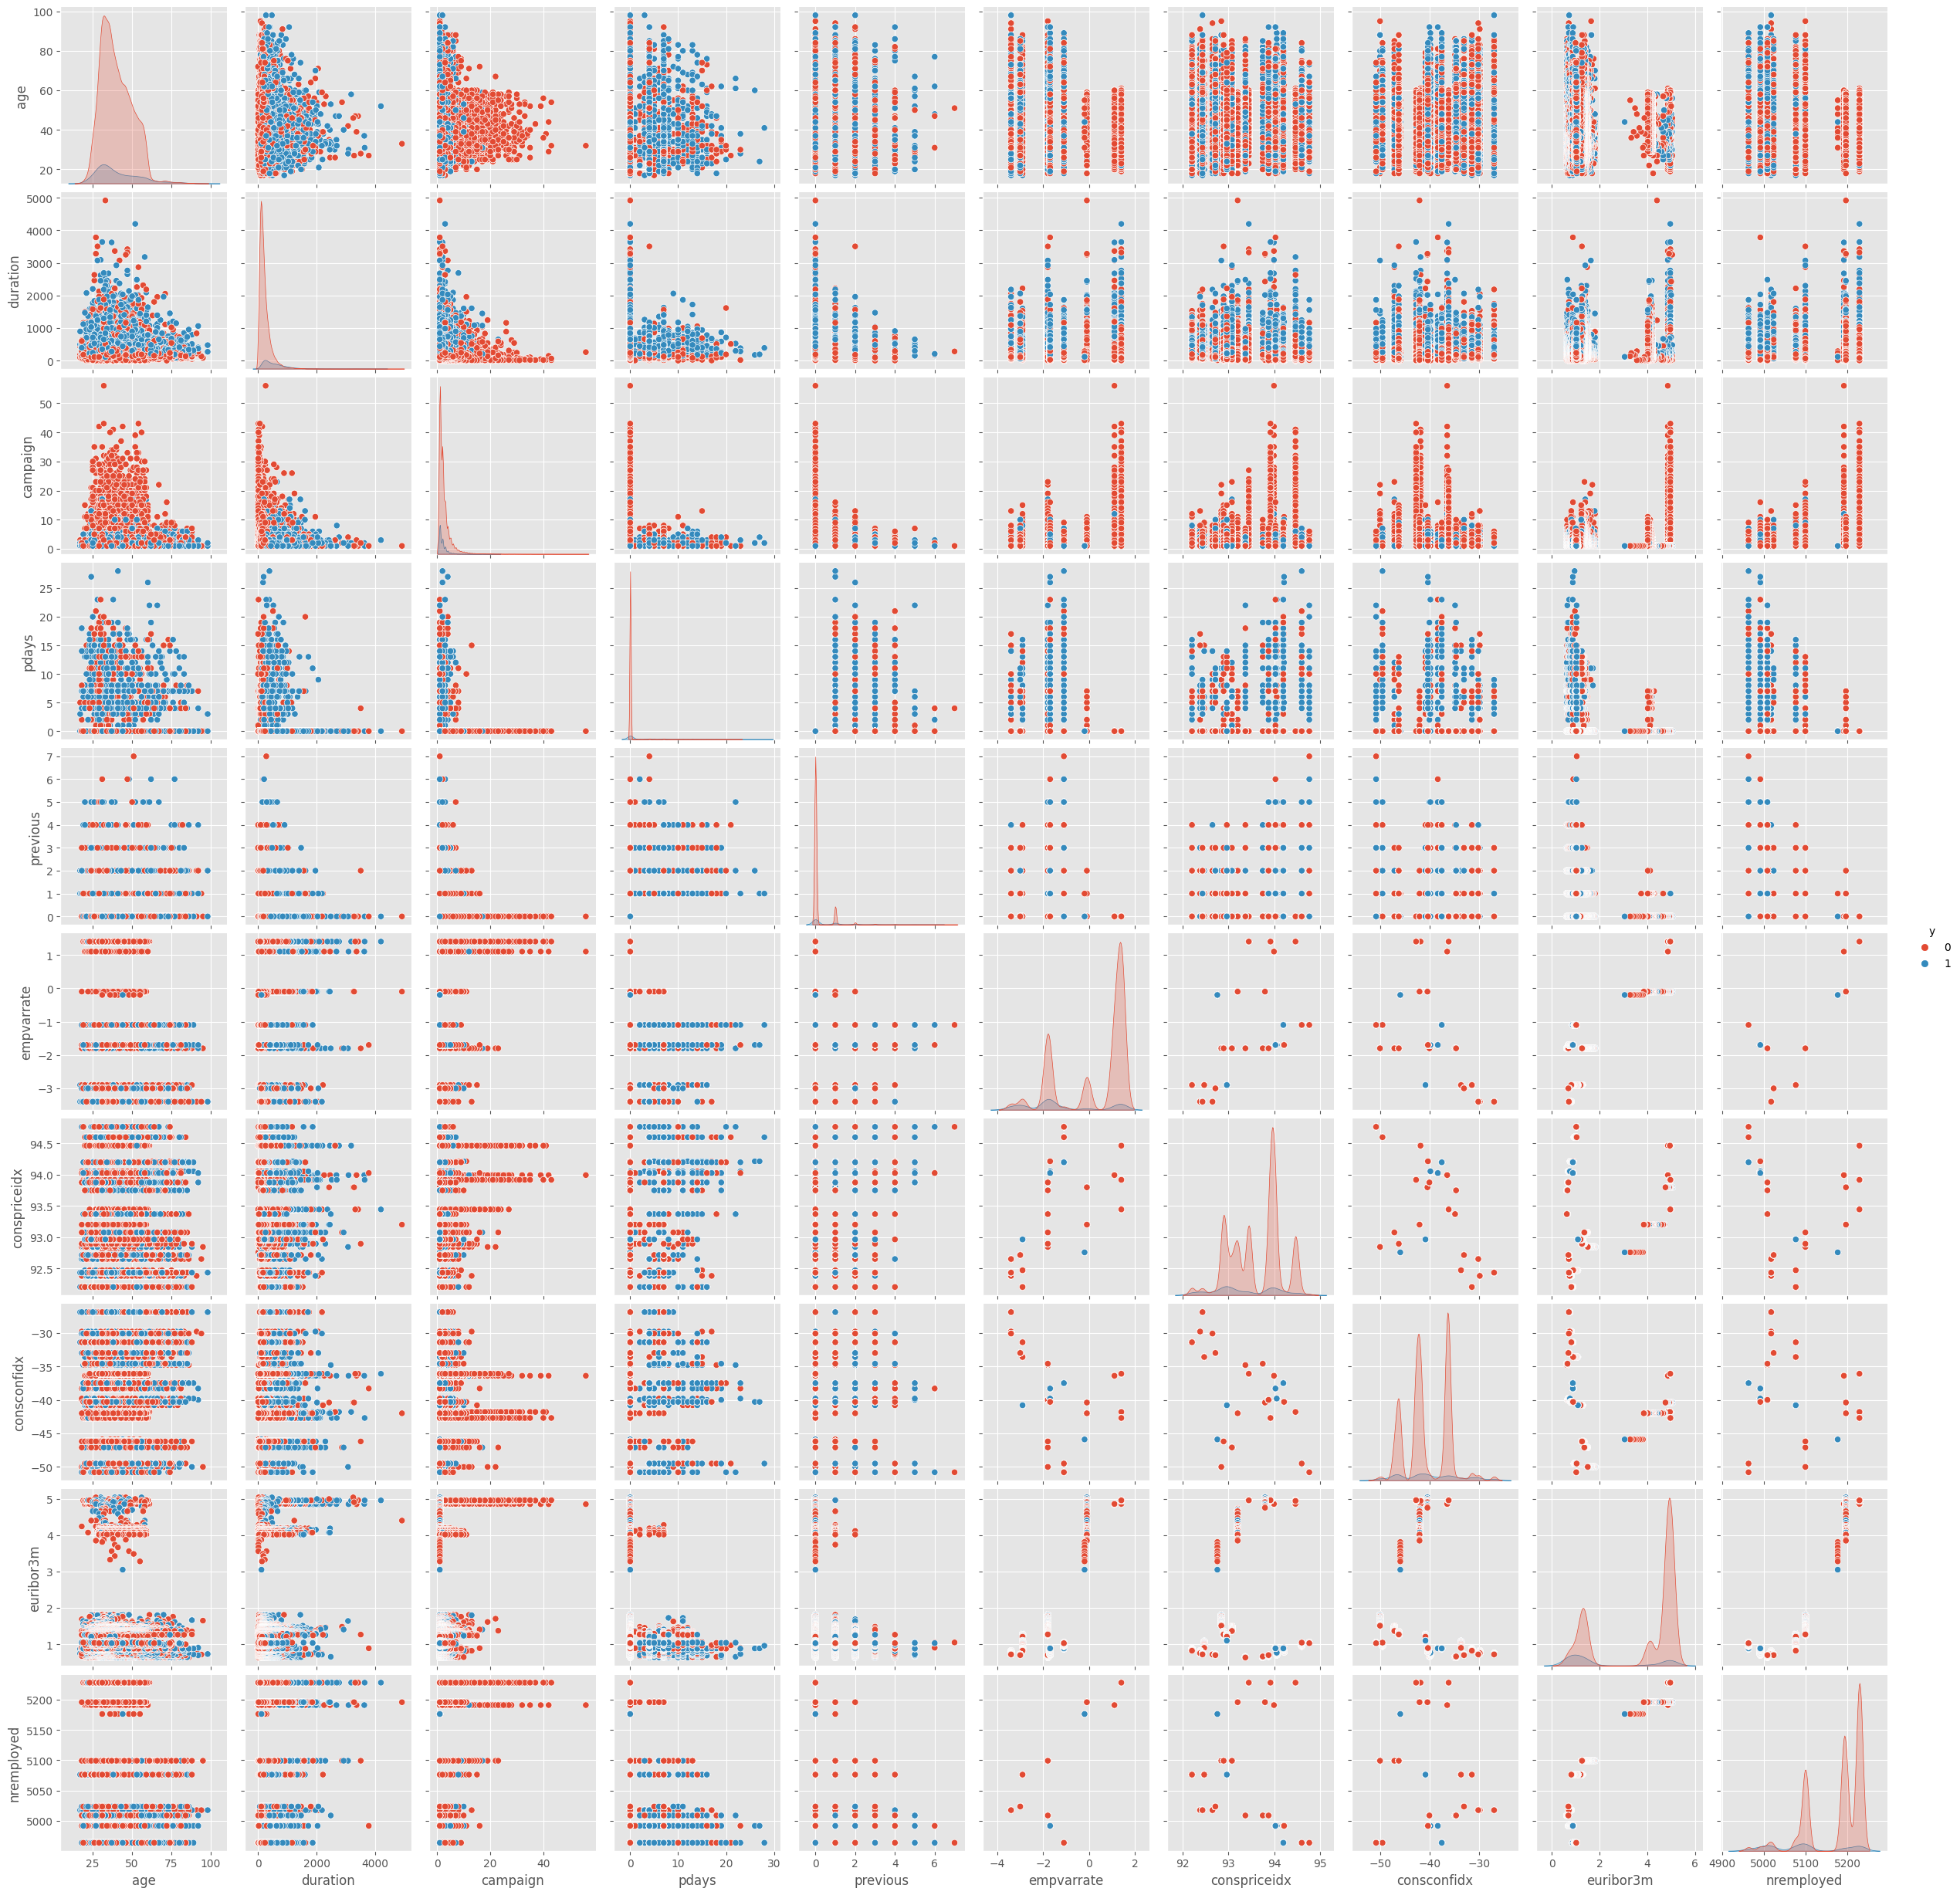

Error in callback <function flush_figures at 0x7f29e00a4940> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
sns.pairplot(data = formatted_df, hue = 'y')

# Classification


In [4]:
# formatted_df= pd.read_csv("Data/formatted_df.csv")
# formatted_df.head()
# cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
formatted_df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

Clear imbalance. Few strategies to deal with imbalanced class include:
1. Select the optimal classification metric (not plain accuracy):
  - In this case, both precision and recall are important to us, we'll select the F1 score
2. Under/Over sampling techniques of the majority/minority class respectively
  - We can consider oversampling of the minority class 
3. Synthetic data 
  - SMOTE (Synthetic minority oversampling technique: based on K-means)
4. Changing the decision thresholds 

Let's try first with no change to data, and see the performance 
## Strategy 1: No changes to the original dataset's distribution

In [6]:
X = formatted_df.drop('y', axis=1)
y = formatted_df['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 10, stratify = y)

*DO NOT TOUCH THE TEST SET*

Next pre-processing steps:
1. Scale the numeric features
2. One-hot encode the categorical features

We can create a pipeline for the same

In [8]:
num_cols = [x for x in list(X.columns) if x not in cat_cols]
num_cols, cat_cols

(['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'empvarrate',
  'conspriceidx',
  'consconfidx',
  'euribor3m',
  'nremployed'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'])

In [9]:
#create a pipeline for scaling the numeric features and encoding the categorical features 

transformer = ColumnTransformer([('scaler', StandardScaler(), num_cols),
                                 ('onehot', OneHotEncoder(), cat_cols)])


In [10]:
# scale and encode the features in the training set (compatible with SGD estimator)
X_train_tr = transformer.fit_transform(X_train) 

###Classifer 1: Logistic Regression

In [ ]:
#Instantiate an SGDclassifier with loss = 'log_loss' for logistic classifer
log_clf = SGDClassifier(loss = 'log_loss', eta0 = 0.01)

#define a pipeline to perform both transformation and model training 
clf = Pipeline([('trans', transformer), ('log_clf', log_clf)])
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
log_clf.intercept_, log_clf.coef_

(array([-10.2051949]),
 array([[-9.22842414e-03,  1.25806283e+00, -1.04717516e-03,
          1.63974588e-01,  1.43404947e-01, -2.03828141e+00,
          9.01164453e-01,  5.90619969e-04,  5.11732097e-01,
          7.05049264e-03,  2.62552223e-01,  3.75482251e-02,
          4.23063181e-02,  2.13783239e-01,  1.53702546e-01,
          5.17823383e-01,  7.85062505e-02,  6.14993563e-02,
          5.32644082e-01,  2.05214791e-01,  3.58334728e-01,
          1.11129142e-01,  7.13405572e-01,  6.55249540e-01,
          6.82861327e-01,  5.23527844e-01,  1.38751845e-01,
          3.66709744e-01,  1.46797101e-01,  2.50785669e-01,
          4.93910194e-01,  3.82585637e-01,  4.06667048e-01,
          3.88837046e-01,  1.43704728e+00,  1.14013919e+00,
         -2.14218946e-03,  8.51213099e-01,  8.26755724e-01,
          8.97075462e-01,  8.85758294e-01,  8.26755724e-01,
          8.62530267e-01,  1.58115449e+00,  9.93889792e-01,
          3.66842749e-03,  6.09620515e-01,  3.33603459e-01,
          2.99261

*Cross validation score:*

In [ ]:
scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'f1')
print(f'Mean f1 score from cross validation: {scores.mean():.4f}, \nstandard deviation: {scores.std():.4f}')

Mean f1 score from cross validation: 0.5142, 
standard deviation: 0.0223


The mean f1 score from the cross validation set is very low at ~.5

####*Hyper-parameter tuning on the logistic classifier to optimize the model*

In [ ]:
#define the hyper-parameter space for logistic regression
param_grid_log = [{"penalty": ['l1', 'l2', 'elasticnet'],
               "alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 0, 0.5, 1, 5, 10, 25, 100],
               "learning_rate": ['constant','adaptive', 'optimal']}]

#Instantiate a Grid Search over the hyper-parameter space
grid_log_clf = GridSearchCV(log_clf, param_grid = param_grid_log, cv = 5, verbose=True, n_jobs=-1, scoring = 'f1')

#fit the GridSearchCV on the training set (will use tranformed training set)
grid_log_clf.fit(X_train_tr, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 892, in fit
    self._more_validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py", line 151, in _more_validate_params
    raise ValueError(
ValueError: alpha must

GridSearchCV(cv=5, estimator=SGDClassifier(eta0=0.01, loss='log_loss'),
             n_jobs=-1,
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 0.5, 1,
                                    5, 10, 25, 100],
                          'learning_rate': ['constant', 'adaptive', 'optimal'],
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             scoring='f1', verbose=True)

In [ ]:
#Get the best hyper-paramters from the hyper-parameter space defined
grid_log_clf.best_params_, grid_log_clf.best_estimator_

({'alpha': 0.0001, 'learning_rate': 'constant', 'penalty': 'l1'},
 SGDClassifier(eta0=0.01, learning_rate='constant', loss='log_loss',
               penalty='l1'))

Best hyper-parameter for the SGDClassifier : alpha = 0.0001, learning_rate = 'constant', penalty = 'l1'

In [ ]:
# results = grid_log_clf.cv_results_
# results.keys()
# for mean_score, params in zip(results['mean_test_score'], results['params']):
#   print(mean_score, params)

In [ ]:
#instantiate the optimal logistic classifier
log_clf_optim = SGDClassifier(loss = 'log_loss', penalty = 'l1', alpha = 0.0001, learning_rate = 'constant', eta0 = 0.01)

#Define the optimal pipeline for logictic classifier using SGDClassifer class
clf_pipe = Pipeline([('trans', transformer), ('log_clf', log_clf_optim)])

#fit the pipeline on the training set 
clf_pipe.fit(X_train, y_train)

#Accuracy on the train set
print("Accuracy on the training set", clf_pipe.score(X_train, y_train))

#F1 Score on the train set
print("F1 score on the training set:", f1_score(clf_pipe.predict(X_train), y_train))

#Cross validation score (F1 Score)
scores = cross_val_score(clf_pipe, X_train, y_train, cv = 5, scoring = 'f1')
print("\n")
print(scores)
print("\n")
print(f'Mean f1 score from cross validation: {scores.mean():.4f}, \nstandard deviation: {scores.std():.4f}')

Accuracy on the training set 0.9111077389984825
F1 score on the training set: 0.5112631403303854


[0.60382514 0.56738645 0.49116905 0.51677852 0.48176421]


Mean f1 score from cross validation: 0.5322, 
standard deviation: 0.0465


*Performace of the Optimized Logistic Classifier:*

Mean F1 score: ~0.53

#### Feature Importance from Logistic Regression Classifier:

###Random Forest Classifier 

In [ ]:
#Instantiate a random forest classifier
rf_clf = RandomForestClassifier()

#fit the vanilla rf model (using CV strategy)

scores = cross_val_score(rf_clf, X_train_tr, y_train, cv = 5, scoring = 'f1')
print("The F1 scores on the validation sets: \n", scores)
print(f'Mean f1 score from cross validation: {scores.mean():.4f}, \nstandard deviation: {scores.std():.4f}')

The F1 scores on the validation sets: 
 [0.54516387 0.52727273 0.53471668 0.53685897 0.54153355]
Mean f1 score from cross validation: 0.5371, 
standard deviation: 0.0061


####Hyper-Parameter Tuning for Random Forest

In [ ]:
%%time
#define the hyper-parameter space for the random forest classifier
rf_param_grid = [{"n_estimators": [50, 100, 200, 250],
           "max_features": [0.25, 0.3, 0.5, 0.75, 1.0]}]

# set up a grid search over the hyper-parameter space
grid_rf_clf = GridSearchCV(rf_clf, param_grid = rf_param_grid, cv = 5, verbose=True, n_jobs=-1)

#Random search
#random_rf_clf = RandomizedSearchCV(rf_clf, param_distributions = rf_param_grid, cv = pds, verbose=True, n_jobs=-1, random_state= 42)

#fit it on the training set, evaluated on the cross-validation set
grid_rf_clf.fit(X_train_tr, y_train)

print("end of training")

#get the best estimator hyper-parameters
print("The best set of hyper-parameters: \n", grid_rf_clf.best_params_)

print(grid_rf_clf.best_estimator_)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
end of training
The best set of hyper-parameters: 
 {'max_features': 0.25, 'n_estimators': 250}
RandomForestClassifier(max_features=0.25, n_estimators=250)
CPU times: user 22.6 s, sys: 1.05 s, total: 23.6 s
Wall time: 21min 53s


In [ ]:
grid_rf_clf.best_estimator_

RandomForestClassifier(max_features=0.25, n_estimators=250)

*Best hyper-parameter for the RandomForest Classifier : n_estimators = 250, max_features = 0.25*

In [ ]:
#instantiate the optimal rf classifier
rf_clf_optim = RandomForestClassifier(n_estimators =250 , max_features =0.25 , oob_score = True)

#Define the optimal pipeline for Random Forest Classifier
rf_clf_pipe = Pipeline([('trans', transformer), ('rf_clf', rf_clf_optim)])

#fit the pipeline on the training set (using cross validation score with 5 folds) 

scores_rf = cross_val_score(rf_clf_pipe, X_train, y_train, cv = 5, scoring = 'f1')
print("The F1 scores on the cross-validation sets: \n", scores_rf)
print(f'Mean f1 score from cross validation: {scores_rf.mean():.4f}, \nstandard deviation: {scores_rf.std():.4f}')


The F1 scores on the cross-validation sets: 
 [0.5952024  0.57099468 0.57418398 0.57400451 0.58687815]
Mean f1 score from cross validation: 0.5803, 
standard deviation: 0.0061


*Performace of the Optimized Random Forest Classifier (n_estimators = 250, max_features = 25%):*

Mean F1 score: ~0.58

####Feature Importance from Random Forest Classifier:

###Classifier 3: ExtraTrees Classifier (more randomness, better variance expected)

In [ ]:
#Instantiate a ExtraTrees classifier
et_clf = ExtraTreesClassifier()

#fit the vanilla ET model (using CV strategy)

scores_et = cross_val_score(et_clf, X_train_tr, y_train, cv = 5, scoring = 'f1')
print("The F1 scores on the validation sets: \n", scores_et)
print(f'Mean f1 score from cross validation: {scores_et.mean():.4f}, \nstandard deviation: {scores_et.std():.4f}')

The F1 scores on the validation sets: 
 [0.44966443 0.42413487 0.44783715 0.465355   0.45631891]
Mean f1 score from cross validation: 0.4487, 
standard deviation: 0.0137


####Hyper-Parameter tuning on the Extra Trees classifier

In [ ]:
%%time

#define the hyper-parameter space for the Extra Trees classifier
et_param_grid = [{"n_estimators": [50, 100, 200, 250],
           "max_features": [0.25, 0.3, 0.5, 0.75, 1.0]}]

# set up a grid search over the hyper-parameter space
grid_et_clf = GridSearchCV(et_clf, param_grid = et_param_grid, cv = 5, verbose=True, n_jobs=-1)

#Random search
#random_et_clf = RandomizedSearchCV(et_clf, param_distributions = et_param_grid, cv = 5, verbose=True, n_jobs=-1, random_state= 42)

#fit it on the training set, evaluated on the cross-validation set
grid_et_clf.fit(X_train_tr, y_train)

print("end of training")

#get the best estimator hyper-parameters for Extra Trees classifier
print("The best set of hyper-parameters for the extra trees classifer: \n", grid_et_clf.best_params_)

print(grid_et_clf.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
end of training
The best set of hyper-parameters for the extra trees classifer: 
 {'max_features': 0.75, 'n_estimators': 200}
ExtraTreesClassifier(max_features=0.75, n_estimators=200)
CPU times: user 46.7 s, sys: 1.45 s, total: 48.2 s
Wall time: 33min 15s


*Best hyper-parameter for the ExtraTreeslassifier : n_estimators = 200, n_features = 0.75*

In [ ]:
#instantiate the optimal ET classifier
et_clf_optim = ExtraTreesClassifier(n_estimators =200 , max_features =0.75)

#Define the optimal pipeline for ExtraTrees classifier
et_clf_pipe = Pipeline([('trans', transformer), ('et_clf', et_clf_optim)])

#fit the pipeline on the training set (using cross-validation score with 5 folds) 
scores_et = cross_val_score(et_clf_pipe, X_train, y_train, cv = 5, scoring = 'f1')

#Print the performance
print("Extra Trees Classifier Performance: \n")
print("The F1 scores on the cross-validation sets: \n", scores_et)
print(f'Mean f1 score from cross validation: {scores_et.mean():.4f}, \nstandard deviation: {scores_et.std():.4f}')

Extra Trees Classifier Performance: 

The F1 scores on the cross-validation sets: 
 [0.58064516 0.56676558 0.54651163 0.57351865 0.56777857]
Mean f1 score from cross validation: 0.5670, 
standard deviation: 0.0114


*Performace of the Optimized ExtraTrees Classifier (n_estimators =200 , max_features = 0.75):*

Mean F1 score: ~0.56

### Classifier 4: AdaBoost (Boosting Classfier)

In [ ]:
#Instantiate a AdaBoost classifier
ada_clf = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth= 2), random_state= 42)

#fit the vanilla AdaBoost model (using CV strategy)
scores_ada = cross_val_score(ada_clf, X_train_tr, y_train, cv = 5, scoring = 'f1')

#Cross validation score from the vanilla AdaBoost model
print("The F1 scores on the validation sets: \n", scores_ada)
print(f'Mean f1 score from cross validation: {scores_ada.mean():.4f}, \nstandard deviation: {scores_ada.std():.4f}')

The F1 scores on the validation sets: 
 [0.58127341 0.57875458 0.57057506 0.58762118 0.55265123]
Mean f1 score from cross validation: 0.5742, 
standard deviation: 0.0121


####Hyper-Parameter tuning for AdaBoost

In [ ]:
%%time

#define the hyper-parameter space for the AdaBoost classifier
ada_param_grid = [{"n_estimators": [25, 50, 100, 200, 250],
           "learning_rate": [0.01, 0.1, 1, 5, 10]}
]

# set up a grid search over the hyper-parameter space
grid_ada_clf = GridSearchCV(ada_clf, param_grid = ada_param_grid, cv = 5, verbose=True, n_jobs=-1)

#Random search
#random_ada_clf = RandomizedSearchCV(ada_clf, param_distributions = ada_param_grid, cv = 5, verbose=True, n_jobs=-1, random_state= 42)

#fit it on the training set, evaluated on the cross-validation set
grid_ada_clf.fit(X_train_tr, y_train)

print("end of training")

#get the best estimator hyper-parameters for AdaBoost classifier
print("The best set of hyper-parameters for the AdaBoost classifer: \n", grid_ada_clf.best_params_)

print(grid_ada_clf.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
end of training
The best set of hyper-parameters for the AdaBoost classifer: 
 {'learning_rate': 0.1, 'n_estimators': 250}
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=250, random_state=42)
CPU times: user 25.2 s, sys: 739 ms, total: 25.9 s
Wall time: 15min 28s


*Best hyper-parameter for the AdaBoost Classifier : n_estimators = 250 , learning_rate =0.1 *

In [ ]:
#instantiate the optimal AdaBoost classifier
ada_clf_optim = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth= 2), n_estimators = 500, learning_rate = 0.1, random_state= 42)

#Define the optimal pipeline for AdaBoost classifier
ada_clf_pipe = Pipeline([('trans', transformer), ('ada_clf', ada_clf_optim)])

#fit the pipeline on the training set (using cross-validation score with 5 folds) 

scores_ada = cross_val_score(ada_clf_pipe, X_train, y_train, cv = 5, scoring = 'f1')

#Print the performance
print("AdaBoost Classifier Performance: \n")
print("The F1 scores on the cross-validation sets: \n", scores_ada)
print(f'Mean f1 score from cross validation: {scores_ada.mean():.4f}, \nstandard deviation: {scores_ada.std():.4f}')

AdaBoost Classifier Performance: 

The F1 scores on the cross-validation sets: 
 [0.59372609 0.59087509 0.58797654 0.59377373 0.56161314]
Mean f1 score from cross validation: 0.5856, 
standard deviation: 0.0122


*Performace of the Optimized AdaBoost Classifier (n_estimators = 500 , learning_rate =0.1):*

Mean F1 score: ~0.58

###Classifier 5: XGBoost 


In [ ]:
xgb_clf = xgb.XGBClassifier()

#fit the vanilla XGBoost model (using CV strategy)
scores_xgb = cross_val_score(xgb_clf, X_train_tr, y_train, cv = 5, scoring = 'f1')

#Cross validation score from the XGBoost model
print("The F1 scores on the validation sets: \n", scores_xgb)
print(f'Mean f1 score from cross validation: {scores_xgb.mean():.4f}, \nstandard deviation: {scores_xgb.std():.4f}')

The F1 scores on the validation sets: 
 [0.5767235  0.59439528 0.58290723 0.61481481 0.58465991]
Mean f1 score from cross validation: 0.5907, 
standard deviation: 0.0133


####Hyper-Parameter Tuning

In [ ]:
# %%time

# #define the hyper-parameter space for the XGBoost classifier
# xgb_param_grid = [{"n_estimators": [25, 50, 100, 200, 250, 500],
#            "learning_rate": [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
#            "max_depth": [2,3,5,10]}
# ]

# #set up a grid search over the hyper-parameter space
# #grid_xgb_clf = GridSearchCV(xgb_clf, param_grid = xgb_param_grid, cv = 5, verbose=True, n_jobs=-1)

# #Random search
# random_xgb_clf = RandomizedSearchCV(xgb_clf, param_distributions = xgb_param_grid, cv = 5, verbose=True, n_jobs=-1, random_state= 42)

# #fit it on the training set, evaluated on the cross-validation set
# #grid_xgb_clf.fit(X_train_tr, y_train)
# random_xgb_clf.fit(X_train_tr, y_train)

# print("end of training")

# #get the best estimator hyper-parameters for XGBoost classifier
# print("The best set of hyper-parameters for the XGBoost classifer: \n", random_xgb_clf.best_params_)

# print(random_xgb_clf.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
end of training
The best set of hyper-parameters for the XGBoost classifer: 
 {'n_estimators': 25, 'max_depth': 5, 'learning_rate': 0.1}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
CPU times: user 8.02 s, sys: 525 ms, total: 8.55 s
Wall

In [ ]:
%%time

#define the hyper-parameter space for the XGBoost classifier
xgb_param_grid = [{"n_estimators": [25, 50, 100, 200, 250, 500],
           "learning_rate": [0.001, 0.01, 0.1, 0.5, 1, 5, 10],
           "max_depth": [2,3,5,10]}
]

#set up a grid search over the hyper-parameter space
grid_xgb_clf = GridSearchCV(xgb_clf, param_grid = xgb_param_grid, cv = 5, verbose=True, n_jobs=-1)

#Random search
#random_xgb_clf = RandomizedSearchCV(xgb_clf, param_distributions = xgb_param_grid, cv = 5, verbose=True, n_jobs=-1, random_state= 42)

#fit it on the training set, evaluated on the cross-validation set
grid_xgb_clf.fit(X_train_tr, y_train)
#random_xgb_clf.fit(X_train_tr, y_train)

print("end of training \n")

#get the best estimator hyper-parameters for XGBoost classifier
print("The best set of hyper-parameters for the XGBoost classifer, using grid search: \n", grid_xgb_clf.best_params_)

print(grid_xgb_clf.best_estimator_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
end of training 

The best set of hyper-parameters for the XGBoost classifer, using grid search: 
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
CPU times: user 1min 6s, sys: 

*Using Random Search: Best hyper-parameter for the XGBoost Classifier : n_estimators =25, learning_rate =0.1 , max_depth = 5*

*Using Grid Search: Best hyper-parameter for the XGBoost Classifier : n_estimators =100, learning_rate =0.1 , max_depth =5*

In [ ]:
#instantiate the optimal XGBoost classifier
#xgb_clf_optim = xgb.XGBClassifier(n_estimators = 25, learning_rate = 0.1, max_depth= 5,random_state= 42) #hyper-parameters from RandomSearchCV
xgb_clf_optim = xgb.XGBClassifier(n_estimators = 100, learning_rate =0.1 , max_depth=5 ,random_state= 42) #hyper-parameters from GridSearchCV

#Define the optimal pipeline for XGBoost classifier
xgb_clf_pipe = Pipeline([('trans', transformer), ('xgb_clf', xgb_clf_optim)])

#fit the pipeline on the training set (using cross-validation score with 5 folds) 

scores_xgb = cross_val_score(xgb_clf_pipe, X_train, y_train, cv = 5, scoring = 'f1')

#Print the performance
print("XGBoost Classifier Performance: \n")
print("The F1 scores on the cross-validation sets: \n", scores_xgb)
print(f'Mean f1 score from cross validation: {scores_xgb.mean():.4f}, \nstandard deviation: {scores_xgb.std():.4f}')

XGBoost Classifier Performance: 

The F1 scores on the cross-validation sets: 
 [0.60284218 0.60224719 0.5992674  0.60524345 0.58615611]
Mean f1 score from cross validation: 0.5992, 
standard deviation: 0.0068


*Performace of the Optimized XGBoost Classifier:*

Random Search Optimized: Mean F1 score: ~0.59.   

Grid Search Optimized: Mean F1 score: ~0.6

###Classifer 6: GradientBoostingClassifier


In [ ]:
#Instantiate a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(max_depth= 2, random_state= 42)

#fit the gradient boost model (using CV strategy)
scores_gb = cross_val_score(gb_clf, X_train_tr, y_train, cv = 5, scoring = 'f1')

#Cross validation score from the vanilla GradientBoosting model
print("The F1 scores on the validation sets: \n", scores_gb)
print(f'Mean f1 score from cross validation: {scores_gb.mean():.4f}, \nstandard deviation: {scores_gb.std():.4f}')

The F1 scores on the validation sets: 
 [0.58423493 0.56856703 0.55831452 0.57232704 0.5398773 ]
Mean f1 score from cross validation: 0.5647, 
standard deviation: 0.0149


####Hyper-Parameters tuning

In [25]:
%%time

#define the hyper-parameter space for the XGBoost classifier
gb_param_grid = [{"n_estimators": [50, 100, 200, 250, 500],
           "learning_rate": [0.001, 0.01, 0.1, 0.5, 1],
           "max_depth": [2,3,5,10]}
]

#set up a grid search over the hyper-parameter space
grid_gb_clf = GridSearchCV(gb_clf, param_grid = gb_param_grid, cv = 5, verbose=True, n_jobs=-1)

#fit it on the training set, evaluated on the cross-validation set
grid_gb_clf.fit(X_train_tr, y_train)

print("end of training \n")

#get the best estimator hyper-parameters for Gradient Boosting classifier
print("The best set of hyper-parameters for the GradientBoosting classifer, using grid search: \n", grid_gb_clf.best_params_)

print(grid_gb_clf.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
end of training 

The best set of hyper-parameters for the GradientBoosting classifer, using grid search: 
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
GradientBoostingClassifier(max_depth=5, n_estimators=50, random_state=42)
CPU times: user 48.2 s, sys: 5.75 s, total: 53.9 s
Wall time: 3h 20min 52s


*Best hyper-parameters for Gradient Boosting (from the space defined): n_estimators = 50, max_depth = 5, learning_rate = 0.1*

In [11]:
#instantiate the optimal GradientBoosting classifier
gb_clf_optim = GradientBoostingClassifier(max_depth= 5 , n_estimators =50, learning_rate = 0.1, random_state= 42)

#Define the optimal pipeline for GradientBoosting classifier
gb_clf_pipe = Pipeline([('trans', transformer), ('gb_clf', gb_clf_optim)])

#fit the pipeline on the training set (using cross-validation score with 5 folds) 

scores_gb = cross_val_score(gb_clf_pipe, X_train, y_train, cv = 5, scoring = 'f1')

#Print the performance
print("Gradient Boosting Classifier Performance: \n")
print("The F1 scores on the cross-validation sets: \n", scores_gb)
print(f'Mean f1 score from cross validation: {scores_gb.mean():.4f}, \nstandard deviation: {scores_gb.std():.4f}')

Gradient Boosting Classifier Performance: 

The F1 scores on the cross-validation sets: 
 [0.60579065 0.60817844 0.59825328 0.61710037 0.60750361]
Mean f1 score from cross validation: 0.6074, 
standard deviation: 0.0060


*Performace of the Optimized Gradent Boosting Classifier:*   
Mean F1 score: ~0.6074

##Model Selection
####Out of all the classifiers applied, Gradient Boosting perfomed the best on the cross-validation score (~0.6074)

In [12]:
#Report on the performance on the test set 
gb_clf_pipe.fit(X_train, y_train)
y_test_pred = gb_clf_pipe.predict(X_test)

print(f"The accuracy on the test set: , {gb_clf_pipe.score(X_test, y_test):.4f}")
print(f"The Precision on the test set: , {precision_score(y_test, y_test_pred):.4f}")
print(f"The Recall on the test set: , {recall_score(y_test, y_test_pred):.4f}")
print(f"The F1 score on the test set: , {f1_score(y_test, y_test_pred):.4f}")

The accuracy on the test set: , 0.9164
The Precision on the test set: , 0.6566
The Recall on the test set: , 0.5399
The F1 score on the test set: , 0.5925


In [13]:
y_scores = gb_clf_pipe.decision_function(X_train)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

Performance:


Accuracy: 0.9164    
Precision: 0.6566   
Recall: 0.5399     
F1 Score: 0.5925  

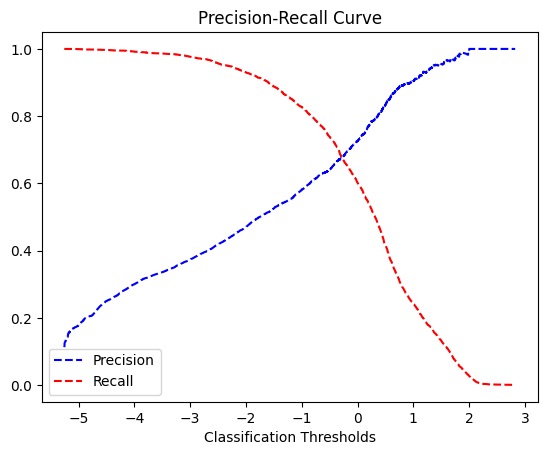

In [25]:
#Plot the precision-recall curve
def plot_prec_rec_curve(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
  plt.plot(thresholds, recalls[:-1], 'r--', label = 'Recall')
  plt.xlabel("Classification Thresholds")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.savefig("Precision_Recall_curve.png")

plot_prec_rec_curve(precisions, recalls, thresholds)

Thresholding to change decision boundary

In [62]:
prec_thres = thresholds[np.where(precisions[ :-1] > 0.8)][0]
y_prec_80 = (y_scores > prec_thres)
print("Precision score: ", precision_score(y_train, y_prec_80))
print("Recall score: ", recall_score(y_train, y_prec_80))

Precision score:  0.7999104744852283
Recall score:  0.4814116379310345


Precions rises to ~0.8, but recall falls to ~0.48

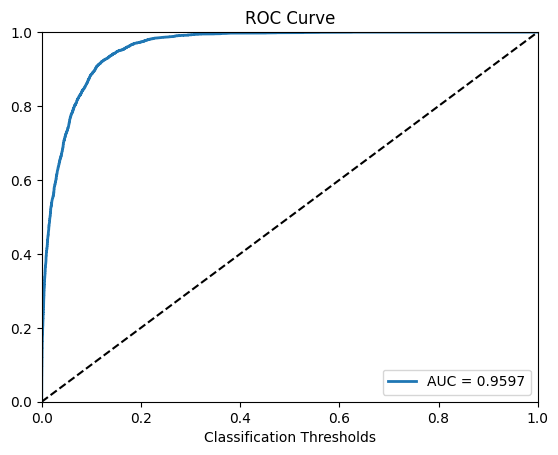

In [24]:
fpr, tpr, threshods = roc_curve(y_train, y_scores)
roc_auc = roc_auc_score(y_train, y_scores)
def plot_roc(fpr, tpr):
  plt.plot(fpr,tpr, lw=2, label = 'AUC = %0.4f' % roc_auc)
  plt.plot([0,1], [0,1], 'k--')
  plt.axis([0,1,0,1])
  plt.xlabel("Classification Thresholds")
  plt.title("ROC Curve")
  plt.legend()
  plt.savefig("Data/ROC_curve.png")

plot_roc(fpr,tpr)

## Strategy 2: Tackle class imbalance

## Oversampling (to balance the classes)

In [ ]:
#get a validation set for cv strategy (to evaluate the models on a preset validation set)
X, y = X_train, y_train
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state= 10, stratify = y)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((26360, 20), (26360,), (6590, 20), (6590,))

In [ ]:
y_train.value_counts(), y_valid.value_counts()

(0    23390
 1     2970
 Name: y, dtype: int64,
 0    5848
 1     742
 Name: y, dtype: int64)

In [ ]:
train_df = pd.concat([X_train, y_train], axis = 1)
train_df.head()

age          job   marital          education  default housing loan  \
11058   46       admin.   married           basic 9y  unknown     yes   no   
22757   30   technician  divorced  university degree       no      no   no   
28205   41       admin.   married           basic 6y  unknown      no   no   
12820   33     services   married        high school       no      no   no   
6453    42  blue-collar  divorced           basic 4y       no     yes  yes   

         contact month day_of_week  ...  campaign  pdays  previous  \
11058  telephone   jun         wed  ...        14      0         0   
22757   cellular   aug         mon  ...         5      0         0   
28205   cellular   apr         tue  ...         2      0         0   
12820   cellular   jul         tue  ...         1      0         0   
6453   telephone   may         wed  ...         1      0         0   

          poutcome empvarrate  conspriceidx  consconfidx  euribor3m  \
11058  nonexistent        1.4        94.465        -41.8      4.962   
22757  nonexistent        1.4        93.444        -36.1      4.965   
28205  nonexistent       -1.8        93.075        -47.1      1.453   
12820  nonexistent        1.4        93.918        -42.7      4.962   
6453   nonexistent        1.1        93.994        -36.4      4.857   

       nremployed  y  
11058      5228.1  0  
22757      5228.1  0  
28205      5099.1  0  
12820      5228.1  0  
6453       5191.0  0  

[5 rows x 21 columns]

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
successful_train_df = train_df[train_df['y'] == 1]
unsuccessful_train_df = train_df[train_df['y'] == 0]
successful_train_df.shape, unsuccessful_train_df.shape

# upsample minority class
df_minority_upsampled = resample(successful_train_df, 
                                 replace=True,    # sample with replacement
                                 n_samples= 23390, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, unsuccessful_train_df])

In [ ]:
df_upsampled.shape

(46780, 21)

In [ ]:
X_train_up = df_upsampled.drop('y', axis=1)
y_train_up = df_upsampled['y']
#X_valid
#Y_valid

In [ ]:
X_train_up_tr = transformer.fit_transform(X_train_up)
X_valid_tr = transformer.transform(X_valid)
X_up_tr = np.concatenate((X_train_up_tr, X_valid_tr), axis=0)
X_up_tr = pd.DataFrame(X_up_tr)

y_up = np.concatenate((y_train_up, y_valid), axis=0)
#y_up

In [ ]:
# X_up_tr.shape, y_up.shape

((53370, 63), (53370,))

### Classfier 1: Logistic Regression (with optimized hyper-parameters)

In [ ]:
# Create a list where train data indices are -1 and validation data indices are 0
split_index = [-1 if x in X_train_up.index else 0 for x in X_up_tr.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

# Use PredefinedSplit in GridSearchCV
grid_log_clf_up = GridSearchCV(log_clf, param_grid = param_grid_log, cv = pds, verbose=True, n_jobs=-1)

# Fit with all data
grid_log_clf_up.fit(X_up_tr, y_up)

NameError: ignored

In [ ]:
grid_log_clf.best_params_, grid_log_clf.best_estimator_

({'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l2'},
 SGDClassifier(loss='log_loss'))

Best hyper-parameters: alpha = 0.0001, learning_rate = optimal, penalty = l2

In [ ]:
#instantiate the optimal logistic classifier
log_clf_up_optim = SGDClassifier(loss = 'log_loss', penalty = 'l2', alpha = 0.0001, learning_rate = 'optimal')

#Define the optimal pipeline for logictic classifier using SGDClassifer class
log_clf_pipe = Pipeline([('trans', transformer), ('log_clf', log_clf_up_optim)])

#fit the pipeline on the training set 
log_clf_pipe.fit(X_train_up, y_train_up)

#Accuracy on the train set
print("Accuracy on the training set", log_clf_pipe.score(X_train_up, y_train_up))

#F1 Score on the train set
print("F1 score on the training set:", f1_score(log_clf_pipe.predict(X_train_up), y_train_up))

#F1 Score on the validation set
print("F1 score on the validation set:", f1_score(log_clf_pipe.predict(X_valid), y_valid))

#Cross validation score (F1 Score)
scores = cross_val_score(log_clf_pipe, X_train_up, y_train_up, cv = 5, scoring = 'f1')
print("\n")
print(scores)
print("\n")
print(f'Mean f1 score from cross validation: {np.nanmean(scores):.4f}')


Accuracy on the training set 0.8696237708422403
F1 score on the training set: 0.8714348953392779
F1 score on the validation set: 0.5799386771791503


[0.8643925  0.85946121        nan 0.87619048 0.87637877]


Mean f1 score from cross validation: 0.8691


In [ ]:
# print("F1 score on the test set", f1_score(log_clf_pipe.predict(X_test), y_test))

# print("Precision score on the test set", precision_score(log_clf_pipe.predict(X_test), y_test))

# print("Recall score on the test set", recall_score(log_clf_pipe.predict(X_test), y_test))

The F1 score of the actual training set is still low at ~0.57

### Classifier 2: Random Forest (tuned with optimized hyper-parameters)

In [ ]:
#Instantiate a random forest classifier
rf_clf = RandomForestClassifier()

#fit the vanilla rf model
rf_clf.fit(X_train_up_tr, y_train_up) #100 estimators by defaut 

#Performance
print("F1 score on upscaled training set: ", f1_score(rf_clf.predict(X_train_up_tr), y_train_up))
print("F1 score on validation set: ",f1_score(rf_clf.predict(X_valid_tr), y_valid) )

F1 score on upscaled training set:  1.0
F1 score on validation set:  0.5789830508474577


In [ ]:
# scores = cross_val_score(rf_clf, X_train_up_tr, y_train_up, cv = 5, scoring = 'f1')
# print(f'Mean f1 score from cross validation: {scores.mean():.4f}, \nstandard deviation: {scores.std():.4f}')

Mean f1 score from cross validation: 0.9707, 
standard deviation: 0.0018


In [ ]:
%%time
#define the hyper-parameter space for the random forest classifier
rf_param_grid = [{"n_estimators": [10, 50, 100, 200, 500],
           "max_features": [5, 10, 15, 20]}]

# set up a grid search over the hyper-parameter space
grid_rf_clf = GridSearchCV(rf_clf, param_grid = rf_param_grid, cv = pds, verbose=True, n_jobs=-1)

#Random search
#random_rf_clf = RandomizedSearchCV(rf_clf, param_distributions = rf_param_grid, cv = pds, verbose=True, n_jobs=-1, random_state= 42)

#fit it on the upscaled training set, evaluated on the validated set using cv = pds parameter
grid_rf_clf.fit(X_up_tr, y_up)

print("end of training")

Fitting 1 folds for each of 20 candidates, totalling 20 fits
end of training
CPU times: user 1.69 s, sys: 277 ms, total: 1.97 s
Wall time: 2min 52s


In [ ]:
grid_rf_clf.best_params_, grid_rf_clf.best_estimator_

({'max_features': 5, 'n_estimators': 10},
 RandomForestClassifier(max_features=5, n_estimators=10))

In [ ]:
grid_rf_clf.cv_results_

{'mean_fit_time': array([ 0.68855333,  2.84533954,  6.31672311,  8.84667587, 21.91136241,
         0.55021477,  3.63263535,  6.21057796, 13.12066555, 32.59732509,
         0.71782088,  3.54559016,  9.34893727, 16.11748505, 54.51597857,
         0.86262846,  5.22496796,  9.87971449, 33.44751978, 41.09743953]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 'mean_score_time': array([0.09227157, 0.6230607 , 0.73292208, 1.49457884, 5.11087918,
        0.07626486, 0.63467646, 0.66010809, 1.35638547, 3.2773695 ,
        0.07046628, 0.32199264, 0.6128335 , 1.25326324, 5.94061804,
        0.07241511, 0.47949839, 0.66183209, 2.22738266, 2.1783421 ]),
 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 'param_max_features': masked_array(data=[5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 15, 15, 15, 15, 15,
                    20, 20, 20, 20, 20],
              mask=[False, F

In [ ]:
# %%time
# grid_rf_clf.fit(X_train_up_tr, y_train_up)
# #random_rf_clf.fit(X_train_up_tr, y_train_up)
# print("end of training")

# grid_rf_clf.best_params_, grid_rf_clf.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
end of training
CPU times: user 9.58 s, sys: 1.28 s, total: 10.9 s
Wall time: 21min 56s


Best hyper-paramters: max_features = 5, n_estimators = 10


In [ ]:
#instantiate the optimal rf classifier
rf_clf_optim = RandomForestClassifier(n_estimators = 10, max_features = 5, oob_score = True, criterion = 'gini')

#Define the optimal pipeline for logictic classifier using SGDClassifer class
rf_clf_pipe = Pipeline([('trans', transformer), ('rf_clf', rf_clf_optim)])

#fit the pipeline on the training set 
rf_clf_pipe.fit(X_train_up, y_train_up)

#Accuracy on the train set
print("Accuracy on the training set", rf_clf_pipe.score(X_train_up, y_train_up))

#F1 Score on the train set
print("F1 score on the training set:", f1_score(rf_clf_pipe.predict(X_train_up), y_train_up))

#F1 Score on the validation set
print("F1 score on the validation set:", f1_score(rf_clf_pipe.predict(X_valid), y_valid))

# #Cross validation score (F1 Score)
# scores = cross_val_score(rf_clf_pipe, X_train_up, y_train_up, cv = 5, scoring = 'f1')
# print("\n")
# print(scores)
# print("\n")
# print(f'Mean f1 score from cross validation: {np.nanmean(scores):.4f}')

Accuracy on the training set 0.9995297135528003
F1 score on the training set: 0.9995299145299145
F1 score on the validation set: 0.5353756382202772


In [ ]:
# rf_clf_optim = RandomForestClassifier(n_estimators = 10, max_features = 5, oob_score = True, criterion = 'gini')

# rf_clf_pipe = Pipeline([('trans', transformer), ('rf_clf', rf_clf_optim)])
# rf_clf_pipe.fit(X_train_up, y_train_up)
# #Score on the train set (Accuracy)
# print("Accuracy on the upscaled training set", rf_clf_pipe.score(X_train_up, y_train_up))
# #Cross validation score (F1 Score)
# scores = cross_val_score(rf_clf_pipe, X_train_up, y_train_up, cv = 10, scoring = 'f1')
# print(f'Mean f1 score from cross validation: {np.nanmean(scores):.4f}')

# print("F1 score on the actual training set", f1_score(rf_clf_pipe.predict(X_train), y_train))

In [ ]:
# print("F1 score on the test set", f1_score(rf_clf_pipe.predict(X_test), y_test))

# print("Precision score on the test set", precision_score(rf_clf_pipe.predict(X_test), y_test))

# print("Recall score on the test set", recall_score(rf_clf_pipe.predict(X_test), y_test))

#### Feature Importance

### Classifier 3: AdaBoost (with optimized hyper-parameters)

In [ ]:
ada_clf = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth= 2), random_state= 42)

In [ ]:
ada_clf.fit(X_train_up_tr, y_train_up) #50 estimators by defaut 
#ada_clf.score(X_train_up_tr, y_train_up)
print("F1 score on upscaled training set: ", f1_score(ada_clf.predict(X_train_up_tr), y_train_up))
print("F1 score on actual training set: ",f1_score(ada_clf.predict(X_train_tr), y_train) )

F1 score on upscaled training set:  0.8992654083078038
F1 score on actual training set:  0.3154281791659516


In [ ]:
scores = cross_val_score(ada_clf, X_train_up_tr, y_train_up, cv = 5, scoring = 'f1')
print(f'Mean f1 score from cross validation: {scores.mean():.4f}, \nstandard deviation: {scores.std():.4f}')

Mean f1 score from cross validation: 0.8939, 
standard deviation: 0.0014


In [ ]:
ada_param_grid = [{"n_estimators": [5, 10, 50, 100, 200, 250],
           "learning_rate": [0.01, 0.1, 0.5, 1, 5, 10, 20]}
]

In [ ]:
grid_ada_clf = GridSearchCV(ada_clf, param_grid = ada_param_grid, cv = 5, verbose=True, n_jobs=-1)
#random_ada_clf = RandomizedSearchCV(ada_clf, param_distributions = ada_param_grid, cv = 5, verbose=True, n_jobs=-1, random_state= 42)

In [ ]:
%%time
grid_ada_clf.fit(X_train_up_tr, y_train_up)
#random_ada_clf.fit(X_train_up_tr, y_train_up)
print("end of training")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
end of training
CPU times: user 1min 13s, sys: 3.07 s, total: 1min 16s
Wall time: 55min 18s


In [ ]:
#best hyper-parameters
grid_ada_clf.best_params_, grid_ada_clf.best_estimator_

({'learning_rate': 1, 'n_estimators': 250},
 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                    learning_rate=1, n_estimators=250, random_state=42))

In [ ]:
ada_clf_optim = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth= 5), n_estimators = 250 , learning_rate = 1 , random_state= 42)

In [ ]:
ada_clf_pipe = Pipeline([('trans', transformer), ('ada_clf', ada_clf_optim)])
ada_clf_pipe.fit(X_train_up, y_train_up)
#Score on the train set (Accuracy)
print("Accuracy on the upscaled training set", ada_clf_pipe.score(X_train_up, y_train_up))
#Cross validation score (F1 Score)
scores = cross_val_score(ada_clf_pipe, X_train_up, y_train_up, cv = 10, scoring = 'f1')
print(f'Mean f1 score from cross validation: {np.nanmean(scores):.4f}')

print("F1 score on the actual training set", f1_score(ada_clf_pipe.predict(X_train), y_train))

Accuracy on the upscaled training set 1.0
Mean f1 score from cross validation: 0.9697
F1 score on the actual training set 1.0


In [ ]:
# print("F1 score on the test set", f1_score(ada_clf_pipe.predict(X_test), y_test))

# print("Precision score on the test set", precision_score(ada_clf_pipe.predict(X_test), y_test))

# print("Recall score on the test set", recall_score(ada_clf_pipe.predict(X_test), y_test))

### Classifier 4: Gradient Boost

### Classifier 5: XGBoost

In [ ]:
xgb_clf = xgb.XGBClassifier()

### Classifier 6: Feed-Forward Neural Network

## Strategy 2: SMOTE

In [ ]:
#X_train

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
#X_train
X_train_tr = transformer.fit_transform(X_train)
#y_train 
X_train_sm, y_train_sm = sm.fit_resample(X_train_tr, y_train)
train_df_sm = pd.concat([pd.DataFrame(X_train_sm), pd.DataFrame(y_train_sm)], axis=1)

In [ ]:
print(train_df_sm[train_df_sm['y']== 0].shape)
print(train_df_sm[train_df_sm['y']== 1].shape)

(29238, 64)
(29238, 64)


### Classifier 1: Logistic Regression

In [ ]:
grid_log_clf.fit(X_train_sm, y_train_sm)
grid_log_clf.best_params_, grid_log_clf.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


({'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l1'},
 SGDClassifier(loss='log_loss', penalty='l1'))

In [ ]:
log_clf_optim_sm = SGDClassifier(loss = 'log_loss', penalty = 'l2', alpha = 0.0001, learning_rate = 'optimal')

In [ ]:
X_train_sm

array([[ 1.43695734,  0.91546751, -0.20756797, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.4766036 , -0.11636807, -0.20756797, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.34092197,  0.25954229, -0.20756797, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.62233997,  2.67238549, -0.53221647, ...,  0.        ,
         0.        ,  1.        ],
       [-1.22742353,  1.74547551, -0.47379176, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.47634023,  3.59353407, -0.28722165, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
log_clf_optim_sm.fit(X_train_sm, y_train_sm)

SGDClassifier(loss='log_loss')

In [ ]:
#Score on the train set (Accuracy)
print("Accuracy on the SMOTE augmented training set", log_clf_optim_sm.score(X_train_sm, y_train_sm))

#Cross validation score (F1 Score)
scores = cross_val_score(log_clf_optim_sm, X_train_sm, y_train_sm, cv = 10, scoring = 'f1')
print(f'Mean f1 score from cross validation: {np.nanmean(scores):.4f}')
print("F1 score on the actual training set", f1_score(log_clf_optim_sm.predict(X_train_tr), y_train))

Accuracy on the SMOTE augmented training set 0.8892537109241399
Mean f1 score from cross validation: 0.8861
F1 score on the actual training set 0.5830461750516885


The F1 score is still low (even with SMOTE)

### Classifier 2: Random Forest (optimized hyper-parameters)

In [ ]:
rf_clf_sm = RandomForestClassifier()

In [ ]:
rf_clf_sm.fit(X_train_sm, y_train_sm) #100 estimators by defaut 

print("F1 score on synthetic training set: ", f1_score(rf_clf_sm.predict(X_train_sm), y_train_sm))
print("F1 score on actual training set: ",f1_score(rf_clf_sm.predict(X_train_tr), y_train) )

F1 score on synthetic training set:  1.0
F1 score on actual training set:  1.0


In [ ]:
grid_rf_clf_sm = GridSearchCV(rf_clf_sm, param_grid = rf_param_grid, cv = 5, verbose=True, n_jobs=-1)
#random_rf_clf_sm = RandomizedSearchCV(rf_clf_sm, param_distributions = rf_param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
%%time
grid_rf_clf_sm.fit(X_train_sm, y_train_sm)
#random_rf_clf_sm.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 57.8 s, sys: 1.94 s, total: 59.7 s
Wall time: 33min


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_features': [5, 10, 15, 20],
                          'n_estimators': [10, 50, 100, 200, 500]}],
             verbose=True)

In [ ]:
#best hyper-parameters
grid_rf_clf_sm.best_params_, grid_rf_clf_sm.best_estimator_

({'max_features': 5, 'n_estimators': 500},
 RandomForestClassifier(max_features=5, n_estimators=500))

Best hyper-parameters: max_features = 5, n_estimators = 100

In [ ]:
rf_clf_optim_sm = RandomForestClassifier(n_estimators = 100, max_features = 5, oob_score = True, criterion = 'gini')

In [ ]:
rf_clf_optim_sm.fit(X_train_sm, y_train_sm)

#Score on the train set (Accuracy)
print("Accuracy on the SMOTE augmented training set", rf_clf_optim_sm.score(X_train_sm, y_train_sm))

#Cross validation score (F1 Score)
scores = cross_val_score(rf_clf_optim_sm, X_train_sm, y_train_sm, cv = 10, scoring = 'f1')
print(f'Mean f1 score from cross validation: {np.nanmean(scores):.4f}')
print("F1 score on the actual training set", f1_score(rf_clf_optim_sm.predict(X_train_tr), y_train))

Accuracy on the SMOTE augmented training set 1.0
Mean f1 score from cross validation: 0.9555
F1 score on the actual training set 1.0


### Classifier 3: AdaBoost

In [ ]:
ada_clf_sm = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth= 5), random_state= 42)

In [ ]:
%%time
grid_ada_clf_sm = GridSearchCV(ada_clf_sm, param_grid = ada_param_grid, cv = 5, verbose=True, n_jobs=-1)
#random_ada_clf_sm = RandomizedSearchCV(ada_clf_sm, param_distributions = ada_param_grid, cv = 5, verbose=True, n_jobs=-1, random_state= 42)

grid_ada_clf_sm.fit(X_train_sm, y_train_up)
#random_ada_clf_sm.fit(X_train_sm, y_train_sm)
print("end of training")

Fitting 5 folds for each of 42 candidates, totalling 210 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/magics/execution.py", line 1335, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 4, in <module>
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.9/dist-packages/joblib/parallel.py", line 1061, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.9/dist-packages/joblib/parallel.py", line 938, in retrie

In [ ]:
#best hyper-parameters
grid_ada_clf_sm.best_params_, grid_ada_clf_sm.best_estimator_

Best hyper-parameters for AdaBoost: n_estimators = 250, learning_rate = 0.01 

In [ ]:
ada_clf_optim_sm = AdaBoostClassifier(estimator= DecisionTreeClassifier(max_depth= 5), n_estimators = 250 , learning_rate = 0.01,random_state= 42)

In [ ]:
ada_clf_optim_sm.fit(X_train_sm, y_train_sm)

#Score on the train set (Accuracy)
print("Accuracy on the SMOTE augmented training set", ada_clf_optim_sm.score(X_train_sm, y_train_sm))

#Cross validation score (F1 Score)
scores = cross_val_score(ada_clf_optim_sm, X_train_sm, y_train_sm, cv = 5, scoring = 'f1')
print(f'Mean f1 score from cross validation: {np.nanmean(scores):.4f}')
print("F1 score on the actual training set", f1_score(ada_clf_optim_sm.predict(X_train_tr), y_train))

#### tackle class imbalance
#### Strategy 3: Thresholding
